<a href="https://colab.research.google.com/github/naishwarya2711/Test/blob/main/Food_Start_up_V9_Removing_R%26R_%26_without_PCA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

Want to open a food start-up

1. What kind do I open?
2. Where should I open ?
3. What should be my key features for my start-up ?
4. What cuisine should I be serving ?
5. What is the key difference(s) between successful and unsuccessful eateries?

What can I analyze?

*   location- population density, do people travel from far, access to metro, demographics, proximity to supply of fresh fruits and vegetables 
*  competetion - Data of already existing players in the space
*   Ratings - What gives a good rating ?
*   Reviews - trend of reviews over a period of time, analyze USP from text, demographics of reviewers
*   how long eatery has been in business ?
*   any seasonality in visting types of eateries ?
*   usp dish or unique dish from Swiggy and Zomato
*   google search pattern analytics for eateries in bangalore, voice search related queries



# Step 1: Data Gathering
*   Took the data of all search results for the Terms "Cafe" and "Restaurant" in Bangalore region from Google Maps through Scraping
*   Took the data of of latest available data sets of Swiggy and Zomato through scraping




# Step 2: Data Pre-processing 

1) Level 1 pre-processing within Excel

*  Deleted the Blank columns
*  Filter out categories related only to Food Industry - Removed camaflouged data like "Internet cafes", Restaurant equipment supply" etc
*  Removed rows with Pincode errors
*  Configured the "About" column - { "Service options": {"No-contact delivery": true, "Delivery": true, "Takeaway": true, "Dine-in": true}, "Highlights": {"Fast service": true, "Great bar food": true}, "Accessibility": {"Wheelchair-accessible entrance": true, "Wheelchair-accessible seating": true, "Wheelchair-accessible toilet": false}, "Offerings": {"Alcohol": true, "Beer": true, "Cocktails": true, "Dancing": true, "Food": true, "Food at bar": true, "Spirits": true, "Wine": true}, "Dining options": {"Dessert": true, "Seating": true}, "Amenities": {"High chairs": true, "Toilets": true}, "Atmosphere": {"Casual": true, "Cosy": true}, "Planning": {"Accepts reservations": true}, "Payments": {"Debit cards": true, "Mobile Wallets": true, "Credit cards": true}}
>> Split of subcategories and elimnated categories - Correlation dependent

*  Converted price range from rupee symbols to price levels of 1 to 4
*  Taken only Dinner ratings and Reviews and ignored Delivery ratings and reviews for Zomato
*  introduced a column called "Veg/Non-Veg" from the column Type
* Copied some columns from Zomato and Swiggy datasets. Zomato ratings - dinner. Cuisines list, cost for two

2) Level 2 pre-processing with Python











In [1]:
# Importing the files into Colab

from google.colab import files
uploaded = files.upload()

Saving Cafe-Rest_datasetV3.csv to Cafe-Rest_datasetV3.csv


In [2]:
# Importing few common Libraries

import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt

In [3]:
#Loading the data into Dataframes

import io
RCdata = pd.read_csv('Cafe-Rest_datasetV3.csv')


<ipython-input-3-a5fd6b116ebe>:4: DtypeWarning: Columns (41,50,52,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140) have mixed types. Specify dtype option on import or set low_memory=False.
  RCdata = pd.read_csv('Cafe-Rest_datasetV3.csv')


In [4]:
RCdata.shape

(25000, 141)

In [5]:
RCdata.tail()

,place_id,query,name,site,type1,subtypes,category,veg/Nveg,phone,full_address,...,catering,Counter service,Dessert,Seating,Family friendly,Groups,LGBTQ+ Friendly,Reservation Required,Accepts Reservations,Popular for
24995,ChIJASmrcOQXrjsRzF4fGsi2Ev8,"restaurant, 560008,Bangalore,Karnataka",Palm Tree Hotel,http://www.palmtreehotel.in/,Restaurant,"Restaurant, Banquet hall, Hotel",Restaurants,Non veg,+91 88619 35800,"Tvs Showroom Building, 107, Old Madras Road , ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24996,ChIJ89hYY68XrjsRAzAVRpg7qpE,"restaurant, 560008,Bangalore,Karnataka",Al Saifu Chicken Shop,NaN,Chicken restaurant,"Chicken restaurant, Chicken shop",Restaurants,Non veg,NaN,"XJHH+G4C, Halasuru, Murphy Town, Bengaluru, Ka...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24997,ChIJ8zlWw00WrjsRAAAAMA_qayc,"restaurant, 560006,Bangalore,Karnataka",A M SEWIYAN,NaN,Restaurant supply store,"Restaurant supply store, Caterer",Restaurants,Non veg,+91 78297 64290,"60, Muniswamappa Rd, RK Block, J.C.Nagar, Beng...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24998,ChIJk7uYt00WrjsR41yNyw2B0m8,"restaurant, 560006,Bangalore,Karnataka",Softee Ice Cream,NaN,Ice cream shop,Ice cream shop,Confectioneries,NaN,NaN,"2H5V+8J8, JC Nagar Main Rd, Munireddypalya, J....",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24999,ChIJpSICZ7YXrjsRXfgrkVntagQ,"restaurant, 560006,Bangalore,Karnataka",Sri Brahmalingeshwar Juice And Condiments,NaN,Juice shop,Juice shop,Confectioneries,veg,NaN,"2, Bimy Mill Road, Ganga Nagar Extension, Gang...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
print(RCdata.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Columns: 141 entries, place_id to Popular for
dtypes: bool(2), float64(16), int64(1), object(122)
memory usage: 26.6+ MB
None


In [7]:
print(RCdata.isnull().sum())

place_id                    0
query                       0
name                        2
site                    20088
type1                       0
                        ...  
Groups                  14224
LGBTQ+ Friendly         24009
Reservation Required    24696
Accepts Reservations    22015
Popular for             24981
Length: 141, dtype: int64


## 2.1 Feature Engineering



In [8]:
RCdata1 = RCdata.drop(columns=['query', 'subtypes', 'type1','phone','full_address','borough','street','city','state','country','area_service','description','country_code','time_zone','reviews_link','reviews_per_score','latitude','longitude', 'photo','street_view','working_hours','other_hours','other_hours','logo','owner_id','owner_title','owner_link','booking_appointment_link','location_link','google_id','cid','reviews_id','Popular for','working_hours_Weekday7','working_hours_Weekday6','working_hours_Weekday5','working_hours_Weekday4','working_hours_Weekday3','working_hours_Weekday2','working_hours_Weekday1','Zomato_Cuisine_1','Zomato_Cuisine_2','Swiggy_Cuisine1','Swiggy_Cuisine2','Payments'])

In [9]:
RCdata1.shape

(25000, 97)

In [10]:
#Merging the Reservation links, Reservation required and Accepts reservations columns

RCdata1.loc[RCdata1["Accepts Reservations"].isnull() & (~RCdata1["reservation_links"].isnull() | ~RCdata1["Reservation Required"].isnull()), "Accepts Reservations"] = True
RCdata1.loc[RCdata1["Accepts Reservations"].isnull() & RCdata1["reservation_links"].isnull() & RCdata1["Reservation Required"].isnull(), "Accepts Reservations"] = False
RCdata1["Accepts Reservations"] = RCdata1["Accepts Reservations"].astype("boolean")

RCdata1 = RCdata1.drop(columns=['reservation_links','Reservation Required'])


In [11]:
#Merging the delivery related columns

RCdata1.loc[RCdata1["Delivery"].isnull() & (~RCdata1["order_links"].isnull() | ~RCdata1["No Contact Delivery"].isnull() | ~RCdata1["Same-day Delivery"].isnull()), "Delivery"] = True
RCdata1.loc[RCdata1["Delivery"].isnull() & RCdata1["order_links"].isnull() & RCdata1["No Contact Delivery"].isnull() & RCdata1["Same-day Delivery"].isnull(), "Delivery"] = False
RCdata1["Delivery"] = RCdata1["Delivery"].astype("int")

RCdata1 = RCdata1.drop(columns=['order_links','Same-day Delivery','No Contact Delivery'])

In [12]:
RCdata1.tail()

,place_id,name,site,category,veg/Nveg,postal_code,rating,reviews,reviews_per_score_1,reviews_per_score_2,...,lunch,dinner,catering,Counter service,Dessert,Seating,Family friendly,Groups,LGBTQ+ Friendly,Accepts Reservations
24995,ChIJASmrcOQXrjsRzF4fGsi2Ev8,Palm Tree Hotel,http://www.palmtreehotel.in/,Restaurants,Non veg,560008,3.9,375.0,48.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
24996,ChIJ89hYY68XrjsRAzAVRpg7qpE,Al Saifu Chicken Shop,NaN,Restaurants,Non veg,560008,3.3,4.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
24997,ChIJ8zlWw00WrjsRAAAAMA_qayc,A M SEWIYAN,NaN,Restaurants,Non veg,560006,5.0,4.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
24998,ChIJk7uYt00WrjsR41yNyw2B0m8,Softee Ice Cream,NaN,Confectioneries,NaN,560006,4.6,5.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
24999,ChIJpSICZ7YXrjsRXfgrkVntagQ,Sri Brahmalingeshwar Juice And Condiments,NaN,Confectioneries,veg,560032,3.7,11.0,2.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [13]:
pd.set_option('display.max_rows', 100)

RCdata1.tail((100))

,place_id,name,site,category,veg/Nveg,postal_code,rating,reviews,reviews_per_score_1,reviews_per_score_2,...,lunch,dinner,catering,Counter service,Dessert,Seating,Family friendly,Groups,LGBTQ+ Friendly,Accepts Reservations
24900,ChIJjXo8UHxtrjsR9dXeOM3Zup4,POWER STAR FISH LAND,NaN,Restaurants,Non veg,560099,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
24901,ChIJLYC60XBtrjsR6a-ieMrLFHw,Vintage restaurant,NaN,Restaurants,Non veg,560100,5.0,7.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
24902,ChIJwXFGP5JsrjsRmm4tOOt3jDI,Mahalaxmi Bhojanalaya,NaN,Restaurants,Non veg,560100,4.0,123.0,14.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
24903,ChIJKy7hQnITrjsRBjCnihJpYNQ,KUNCHALA HIMAKHAR STORE,NaN,Restaurants,Non veg,560035,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
24904,ChIJncR_bF0TrjsRUc17thqllUU,ANITHAS STORE,NaN,Restaurants,Non veg,560035,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
24905,ChIJa0YK9i4VrjsRXhlVO3g0HqA,Lilac Hotel,https://www.lilachotels.com/jayanagar-5thblock...,Restaurants,Non veg,560041,4.7,489.0,7.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
24906,ChIJmxG6GJYVrjsRZqzSLYHVfLU,SRINIVASA STORE,NaN,Restaurants,Non veg,560018,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
24907,ChIJ-dNlmHkVrjsRq58HWyc3ntc,TANIMA HOTEL,NaN,Restaurants,Non veg,560068,5.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
24908,ChIJrzaGASIVrjsRoBOKfRqaxVQ,Best Food Forever,NaN,Restaurants,Non veg,560029,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
24909,ChIJq77D_FUUrjsR1CpiIffg5-A,Habitts,NaN,Restaurants,Non veg,560029,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [14]:
RCdata1 = RCdata1.set_index('place_id')
RCdata1 = RCdata1.drop(columns=['name'])

In [15]:
RCdata1.tail()

,site,category,veg/Nveg,postal_code,rating,reviews,reviews_per_score_1,reviews_per_score_2,reviews_per_score_3,reviews_per_score_4,...,lunch,dinner,catering,Counter service,Dessert,Seating,Family friendly,Groups,LGBTQ+ Friendly,Accepts Reservations
place_id,,,,,,,,,,,,,,,,,,,,,
ChIJASmrcOQXrjsRzF4fGsi2Ev8,http://www.palmtreehotel.in/,Restaurants,Non veg,560008,3.9,375.0,48.0,18.0,36.0,76.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
ChIJ89hYY68XrjsRAzAVRpg7qpE,NaN,Restaurants,Non veg,560008,3.3,4.0,1.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
ChIJ8zlWw00WrjsRAAAAMA_qayc,NaN,Restaurants,Non veg,560006,5.0,4.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
ChIJk7uYt00WrjsR41yNyw2B0m8,NaN,Confectioneries,NaN,560006,4.6,5.0,0.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
ChIJpSICZ7YXrjsRXfgrkVntagQ,NaN,Confectioneries,veg,560032,3.7,11.0,2.0,0.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [16]:
# Take ZS_CostForTwo_Avg

# Calculate the average cost for two and add it as a new column
RCdata1['CostForTwo_INR'] = (RCdata1['Zomato_CostforTwo_INR'] + RCdata1['Swiggy_CostforTwo_INR']) / 2

# Drop the original columns
RCdata1 = RCdata1.drop(['Zomato_CostforTwo_INR', 'Swiggy_CostforTwo_INR'], axis=1)


> The price range parameter for restaurants in Google Maps is as follows:

Inexpensive - Under 500 INR
Moderate - 500 to 1,500 INR
Expensive - 1,500 to 3,000 INR
Very Expensive - Above 3,000 INR

In [17]:
# taking the average of each range and creating a dictionary to map the price range values to the corresponding prices
RCdata1['CostForTwo_Rs'] = RCdata1['Price Range'].map({1: 250, 2: 1000, 3: 2000, 4: 3500, 5: 3500}).fillna(RCdata1['CostForTwo_INR'])

# drop the original "Price Range" and "CostForTwo_INR" columns as they are not needed anymore
RCdata1.drop(['Price Range', 'CostForTwo_INR'], axis=1, inplace=True)


In [18]:
# Main column of rating is from Google maps
RCdata1['ratings'] = RCdata1['rating'].fillna(RCdata1['Zomato_Ratings'])

# drop the Zomato_ratings column
RCdata1.drop(['Zomato_Ratings','rating'], axis=1, inplace=True)

#Filling missing values of rating column with 1
RCdata1['ratings'].fillna(1, inplace=True)

In [19]:
print(RCdata1.isnull().sum())

site                              20088
category                              0
veg/Nveg                           5735
postal_code                           0
reviews                            6401
reviews_per_score_1                6401
reviews_per_score_2                6401
reviews_per_score_3                6401
reviews_per_score_4                6401
reviews_per_score_5                6401
photos_count                       1486
business_status                       0
verified                              0
zone_density                       2621
Delivery                              0
Dine-In                            2404
Drivethrough                      23300
In-store Pick-up                  24684
In-store shopping                 24641
Kerbside Pick-up                  22176
Outdoor seating                   23519
Takeaway                           5135
Assistive hearing loop            24871
Wheelchair-accessible car park    21413
Wheelchair-accessible entrance    20605


In [20]:
#Merging the Drivethrough, Kerbside Pick-up and takeaway columns (The Non-DineIn and Non-Delivery Options)

RCdata1['Drivethrough'] = RCdata1['Drivethrough'].fillna(RCdata1['Kerbside Pick-up'])
RCdata1['Drivethrough'] = RCdata1['Drivethrough'].fillna(RCdata1['In-store Pick-up'])
RCdata1['Takeaway'] = RCdata1['Takeaway'].fillna(RCdata1['Drivethrough'])

# replace missing values with 0 and True values with 1
RCdata1['Drivethrough'] = RCdata1['Drivethrough'].fillna(0).astype(int)
RCdata1['Takeaway'] = RCdata1['Takeaway'].fillna(0).astype(int)

RCdata1 = RCdata1.drop(['Kerbside Pick-up','In-store Pick-up','Drivethrough'],axis=1)


In [21]:
print(RCdata1.isnull().sum())

site                              20088
category                              0
veg/Nveg                           5735
postal_code                           0
reviews                            6401
reviews_per_score_1                6401
reviews_per_score_2                6401
reviews_per_score_3                6401
reviews_per_score_4                6401
reviews_per_score_5                6401
photos_count                       1486
business_status                       0
verified                              0
zone_density                       2621
Delivery                              0
Dine-In                            2404
In-store shopping                 24641
Outdoor seating                   23519
Takeaway                              0
Assistive hearing loop            24871
Wheelchair-accessible car park    21413
Wheelchair-accessible entrance    20605
Wheelchair-accessible lift        24672
Wheelchair-accessible seating     20569
Wheelchair-accessible toilet      23144


In [22]:
RCdata1['Inclusive'] = RCdata1[['Assistive hearing loop', 'Wheelchair-accessible car park', 'LGBTQ+ Friendly','Wheelchair-accessible entrance', 'Wheelchair-accessible lift', 'Wheelchair-accessible seating','Wheelchair-accessible toilet','Braille menu','Gender-nuetral Toilets']].fillna('').apply(lambda x: any(val == True for val in x), axis=1).astype(int)

RCdata1 = RCdata1.drop(['Assistive hearing loop', 'Wheelchair-accessible car park','LGBTQ+ Friendly', 'Wheelchair-accessible entrance', 'Wheelchair-accessible lift', 'Wheelchair-accessible seating','Wheelchair-accessible toilet','Gender-nuetral Toilets','Braille menu'],axis=1)

In [23]:
RCdata1['Drinks Available'] = RCdata1[['Bar on site', 'Cocktails', 'Alcohol', 'Food at Bar', 'Beer','Spirits','Wine','Bar games','Great bar food',]].fillna('').apply(lambda x: any(val == True for val in x), axis=1).astype(int)

RCdata1 = RCdata1.drop(['Bar on site', 'Cocktails', 'Alcohol', 'Food at Bar', 'Beer','Spirits','Wine','Bar games','Great bar food',],axis=1)

In [24]:
RCdata1['Kids_friendly'] = RCdata1[['Good for kids', 'High chairs', "Kids' menu"]].fillna('').apply(lambda x: any(val == True for val in x), axis=1).astype(int)

RCdata1 = RCdata1.drop(['Good for kids', 'High chairs', "Kids' menu"],axis=1)

In [25]:
RCdata1['Audience_Engagement'] = RCdata1[['Karaoke', 'Live Music', 'Live Performances','Quiz Night']].fillna('').apply(lambda x: any(val == True for val in x), axis=1).astype(int)

RCdata1 = RCdata1.drop(['Karaoke', 'Live Music', 'Live Performances','Quiz Night'],axis=1)

In [26]:
#Since the below columns do not convey if the restaurant is pure veg or vegan, dropping the below columns.

RCdata1 = RCdata1.drop(['Halal food', 'Vegetarian Options', 'Vegan Options'],axis=1)

In [27]:
#Style of eating 

def merge_food_serving_style(row):
    if row['All you can eat'] == True:
        return 'All you can eat'
    elif row['Small Plates'] == True:
        return 'Small Plates'
    elif pd.isna(row['All you can eat']) and pd.isna(row['Small Plates']):
        return 'NA'
 
RCdata1['Food Serving style'] = RCdata1.apply(merge_food_serving_style, axis=1)

RCdata1 = RCdata1.drop(['All you can eat', 'Small Plates'],axis=1)

In [28]:
#Healthy options

def merge_Healthy_Options(row):
    if row['Salad Bar'] == True:
        return 'TRUE'
    elif row['Organic Dishes'] == True:
        return 'TRUE'
    elif row['Healthy Options'] == True:
        return 'TRUE'
    elif pd.isna(row['Salad Bar']) and pd.isna(row['Organic Dishes'] and pd.isna(row['Healthy Options'])):
        return 'NA'

RCdata1['Healthy Options'] = RCdata1.apply(merge_Healthy_Options, axis=1)

RCdata1 = RCdata1.drop(['Salad Bar', 'Organic Dishes'],axis=1)

In [29]:
RCdata1['Ambient Seating'] = RCdata1[['Outdoor seating', 'Rooftop Seating', 'Fireplace', 'Cosy']].fillna('').apply(lambda x: any(val == True for val in x), axis=1).astype(int)

RCdata1 = RCdata1.drop(['Outdoor seating', 'Rooftop Seating', 'Fireplace', 'Cosy'],axis=1)

In [30]:
RCdata1 = RCdata1.drop(['Counter service', 'Family friendly', 'Groups','Historic','Romantic','Upmarket','Trending','Dine-In','Dancing','Sport','In-store shopping','Prepared foods','Seating','catering','Happy Hour Food/Drinks','Wi-Fi','Fast Service','Quick Bite','Late-night food'],axis=1)

In [31]:
# get list of columns with more than 20,000 missing observations
null_counts = RCdata1.isnull().sum()
null_cols = null_counts[null_counts > 20000].index.tolist()

# print the list of columns and their null counts
for col in null_cols:
    print(f"{col}: {null_counts[col]}")

site: 20088
Toilets: 20982
Healthy Options: 23888
Women owned: 24495
breakfast: 20896
brunch: 22576
Dessert: 20591


In [32]:
RCdata1['Toilets'].fillna(value=0, inplace=True)  # replace null values with 0
RCdata1.loc[RCdata1['Toilets'] != 0, 'Toilets'] = 1  # replace non-null values with 1

In [33]:
RCdata1['Women owned'].fillna(value=0, inplace=True)  # replace null values with 0
RCdata1.loc[RCdata1['Women owned'] != 0, 'Women owned'] = 1  # replace non-null values with 1

In [34]:
RCdata1['Healthy Options'].fillna(value=0, inplace=True)  # replace null values with 0
RCdata1.loc[RCdata1['Healthy Options'] != 0, 'Healthy Options'] = 1  # replace non-null values with 1

In [35]:
print(RCdata1.isnull().sum())

site                    20088
category                    0
veg/Nveg                 5735
postal_code                 0
reviews                  6401
reviews_per_score_1      6401
reviews_per_score_2      6401
reviews_per_score_3      6401
reviews_per_score_4      6401
reviews_per_score_5      6401
photos_count             1486
business_status             0
verified                    0
zone_density             2621
Delivery                    0
Takeaway                    0
Toilets                     0
Casual                   8363
Coffee                  17579
Healthy Options             0
Women owned                 0
breakfast               20896
brunch                  22576
lunch                   15545
dinner                  16373
Dessert                 20591
Accepts Reservations        0
CostForTwo_Rs           19739
ratings                     0
Inclusive                   0
Drinks Available            0
Kids_friendly               0
Audience_Engagement         0
Food Servi

In [36]:
# get list of columns with more than 20,000 missing observations
null_counts = RCdata1.isnull().sum()
null_cols = null_counts[null_counts > 20000].index.tolist()

# print the list of columns and their null counts
for col in null_cols:
    print(f"{col}: {null_counts[col]}")

site: 20088
breakfast: 20896
brunch: 22576
Dessert: 20591


In [37]:
RCdata1.shape

(25000, 35)

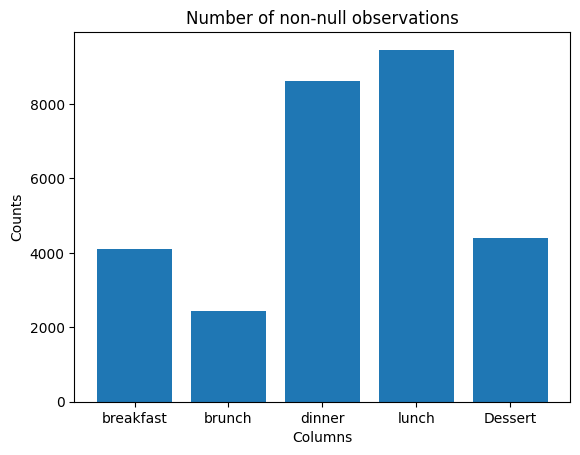

In [38]:
columns = ["breakfast", "brunch", "dinner", "lunch", "Dessert"]
counts = [RCdata1[col].count() for col in columns]

plt.bar(columns, counts)
plt.title("Number of non-null observations")
plt.xlabel("Columns")
plt.ylabel("Counts")
plt.show()


In [39]:
count_rating = RCdata1['ratings'].count()

# calculate the mean
mean_rating = RCdata1['ratings'].mean()

# calculate the median
median_rating = RCdata1['ratings'].median()

# calculate the mode
mode_rating = RCdata1['ratings'].mode()[0]

print(f"Count: {count_rating}")
print(f"Mean: {mean_rating}")
print(f"Median: {median_rating}")
print(f"Mode: {mode_rating}")

Count: 25000
Mean: 3.3732320000000002
Median: 4.0
Mode: 1.0


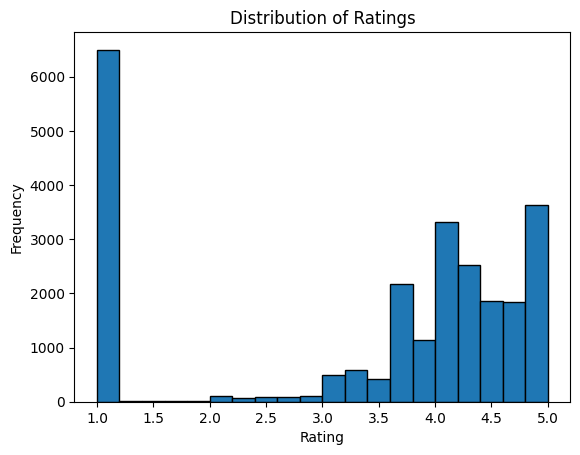

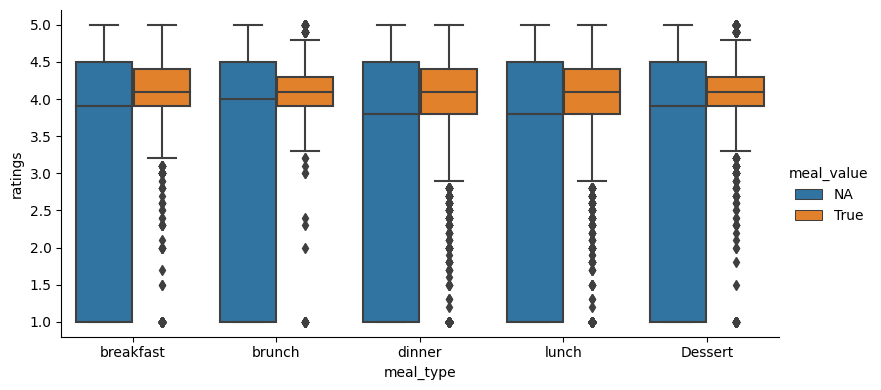

In [40]:
# create a histogram of the ratings column
plt.hist(RCdata1['ratings'], bins=20, edgecolor='black')

# set the title and axis labels
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')

# show the plot
plt.show()

# replace missing values in the categorical columns with 'NA'
RCdata1[['breakfast', 'brunch', 'dinner', 'lunch', 'Dessert']] = RCdata1[['breakfast', 'brunch', 'dinner', 'lunch', 'Dessert']].fillna('NA')

# transform the dataframe from wide format to long format
RCdata1_melt = RCdata1.melt(id_vars=['ratings'], value_vars=['breakfast', 'brunch', 'dinner', 'lunch', 'Dessert'], var_name='meal_type', value_name='meal_value')

# create a categorical plot (box) using Seaborn library
sns.catplot(x='meal_type', y='ratings', hue='meal_value', kind='box', data=RCdata1_melt, height=4, aspect=2)
plt.show()


In [41]:
print(RCdata1_melt)

        ratings  meal_type meal_value
0           3.9  breakfast         NA
1           3.9  breakfast         NA
2           4.0  breakfast         NA
3           4.1  breakfast         NA
4           4.6  breakfast         NA
...         ...        ...        ...
124995      3.9    Dessert         NA
124996      3.3    Dessert         NA
124997      5.0    Dessert         NA
124998      4.6    Dessert         NA
124999      3.7    Dessert         NA

[125000 rows x 3 columns]


Is there a combination that works well ? And is it dependent on the type of establishment too ?

In [43]:
# filter the rows where the number of reviews is greater than 50
mask = RCdata1['reviews'] > 50
filtered_data = RCdata1[mask]

# create a new column that combines the meal columns into a single string
RCdata1['meals'] = RCdata1[['breakfast', 'brunch', 'dinner', 'lunch', 'Dessert']].apply(lambda row: '|'.join(row.astype(str)), axis=1)

# compute the number of establishments for each combination of type and meals
meal_counts = filtered_data.groupby(['category', 'meals']).size()

# compute the average and median of ratings for each group
rating_stats = filtered_data.groupby(['category', 'meals'])['ratings'].agg(['mean', 'median']).round(2)

# join the rating stats with the meal counts table
meal_counts_df = meal_counts.reset_index(name='Number of Establishments')
meal_counts_df = meal_counts_df.join(rating_stats, on=['category', 'meals'])

# filter the table to include only rows where the number of establishments is greater than 0
meal_counts_df = meal_counts_df[meal_counts_df['Number of Establishments'] > 0]

# sort the table by number of establishments in descending order
meal_counts_df = meal_counts_df.sort_values(by='Number of Establishments', ascending=False)

# add border lines to the table
meal_counts_style = meal_counts_df.style \
    .set_properties(**{'border': '1px solid black', 'text-align': 'center'}) \
    .set_table_styles([{'selector': 'th', 'props': [('border', '1px solid black')]}])

# display the styled table
display(meal_counts_style)


,category,meals,Number of Establishments,mean,median
40,Restaurants,NA|NA|True|True|NA,1066,4.030000,4.000000
41,Restaurants,NA|NA|True|True|True,915,4.060000,4.000000
34,Restaurants,NA|NA|NA|NA|NA,873,4.010000,4.000000
63,Restaurants,True|True|True|True|True,823,4.050000,4.000000
49,Restaurants,NA|True|True|True|True,600,4.090000,4.100000
56,Restaurants,True|NA|True|True|NA,481,4.050000,4.100000
57,Restaurants,True|NA|True|True|True,350,4.070000,4.100000
1,Café,NA|NA|NA|NA|NA,272,4.290000,4.300000
30,Confectioneries,NA|NA|NA|NA|NA,252,4.250000,4.200000
62,Restaurants,True|True|True|True|NA,225,4.020000,4.000000


Conclusion : Lunch and Dinner are top priority. Depending on working hours extension can include Breakfast and Brunch

In [44]:
#Dropping the columns of meals above.

RCdata1 = RCdata1.drop(['breakfast', 'brunch', 'dinner', 'lunch', 'Dessert','meals'],axis=1)

## 2.2 Handling the missing values

In [45]:
#Drop columns with very less observations

n = 50  # Number of columns to display
obs_counts = RCdata1.count()  # Count of observations for each column
sorted_cols = obs_counts.sort_values().head(n)  # Sort columns by count and get first n columns
print(sorted_cols)

site                     4912
CostForTwo_Rs            5261
Coffee                   7421
Casual                  16637
reviews_per_score_4     18599
reviews_per_score_3     18599
reviews_per_score_5     18599
reviews_per_score_1     18599
reviews                 18599
reviews_per_score_2     18599
veg/Nveg                19265
zone_density            22379
photos_count            23514
Kids_friendly           25000
Drinks Available        25000
Inclusive               25000
ratings                 25000
Accepts Reservations    25000
Audience_Engagement     25000
Women owned             25000
Delivery                25000
Toilets                 25000
Takeaway                25000
Food Serving style      25000
verified                25000
business_status         25000
postal_code             25000
category                25000
Healthy Options         25000
Ambient Seating         25000
dtype: int64


In [46]:
#Filling missing values of reviews, photo count  column with 1
RCdata1['reviews'].fillna(1, inplace=True)

#Filling missing values of photo count column with 0
RCdata1['photos_count'].fillna(0, inplace=True)

In [47]:
#Filling missing values of Zone Density column with mean

mean_density = RCdata1['zone_density'].mean()
RCdata1['zone_density'] = RCdata1['zone_density'].fillna(mean_density)

In [48]:
RCdata1['Casual'].describe()

count     16637
unique        1
top        True
freq      16637
Name: Casual, dtype: object

In [49]:
RCdata1["Website"] = RCdata1["site"].notnull()

RCdata1 = RCdata1.drop(['site'],axis=1)

In [50]:
# fill missing values with False
RCdata1[['Casual','Coffee']] = RCdata1[['Casual','Coffee']].fillna(False)

# convert column to boolean dtype
RCdata1[['Casual','Coffee']] = RCdata1[['Casual','Coffee']].astype(bool)

# check column description
RCdata1['Casual'].describe()

count     25000
unique        2
top        True
freq      16637
Name: Casual, dtype: object

In [51]:
# Replace missing values in categorical columns as a separate category

# Select categorical columns
cat_cols = RCdata1.select_dtypes(include=['object']).columns

# Replace missing values in categorical columns with 'NA'
RCdata1[cat_cols] = RCdata1[cat_cols].fillna('NA')


In [52]:
n = 50  # Number of columns to display
obs_counts = RCdata1.count()  # Count of observations for each column
dtype_counts = RCdata1.dtypes.value_counts()  # Count of columns for each data type
missing_counts = RCdata1.isnull().sum()  # Count of missing values for each column

# Merge data into a single dataframe
summary_df = pd.DataFrame({
    'data_type': RCdata1.dtypes,
    'missing_count': missing_counts,
    'obs_count': obs_counts
})
sorted_cols = summary_df.sort_values(by='obs_count').head(n)

# Print the first n columns
print(sorted_cols)


                     data_type  missing_count  obs_count
CostForTwo_Rs          float64          19739       5261
reviews_per_score_5    float64           6401      18599
reviews_per_score_1    float64           6401      18599
reviews_per_score_2    float64           6401      18599
reviews_per_score_3    float64           6401      18599
reviews_per_score_4    float64           6401      18599
Women owned              int64              0      25000
Accepts Reservations   boolean              0      25000
ratings                float64              0      25000
Inclusive                int64              0      25000
category                object              0      25000
Healthy Options          int64              0      25000
Kids_friendly            int64              0      25000
Audience_Engagement      int64              0      25000
Food Serving style      object              0      25000
Drinks Available         int64              0      25000
Coffee                    bool 

In [53]:
# convert to Boolean columns
RCdata1[['Website', 'verified', 'Delivery','Takeaway','Toilets','Women owned','Healthy Options','Accepts Reservations','Inclusive','Drinks Available','Kids_friendly','Audience_Engagement','Ambient Seating']] = RCdata1[['Website', 'verified', 'Delivery','Takeaway','Toilets','Women owned','Healthy Options','Accepts Reservations','Inclusive','Drinks Available','Kids_friendly','Audience_Engagement','Ambient Seating']].astype(bool)


In [54]:
RCdata1['Casual'].describe()

count     25000
unique        2
top        True
freq      16637
Name: Casual, dtype: object

In [55]:
# Converting Object to Category
RCdata1[['category', 'veg/Nveg', 'business_status','Food Serving style','postal_code']] = RCdata1[['category', 'veg/Nveg', 'business_status','Food Serving style','postal_code']].astype('category')


In [56]:
RCdata1.dtypes

category                category
veg/Nveg                category
postal_code             category
reviews                  float64
reviews_per_score_1      float64
reviews_per_score_2      float64
reviews_per_score_3      float64
reviews_per_score_4      float64
reviews_per_score_5      float64
photos_count             float64
business_status         category
verified                    bool
zone_density             float64
Delivery                    bool
Takeaway                    bool
Toilets                     bool
Casual                      bool
Coffee                      bool
Healthy Options             bool
Women owned                 bool
Accepts Reservations        bool
CostForTwo_Rs            float64
ratings                  float64
Inclusive                   bool
Drinks Available            bool
Kids_friendly               bool
Audience_Engagement         bool
Food Serving style      category
Ambient Seating             bool
Website                     bool
dtype: obj

In [57]:
RCdata1.to_csv('RCdata1.csv')
files.download("RCdata1.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [58]:
RCdata1.shape

(25000, 30)

In [59]:
RCdata1.tail()

,category,veg/Nveg,postal_code,reviews,reviews_per_score_1,reviews_per_score_2,reviews_per_score_3,reviews_per_score_4,reviews_per_score_5,photos_count,...,Accepts Reservations,CostForTwo_Rs,ratings,Inclusive,Drinks Available,Kids_friendly,Audience_Engagement,Food Serving style,Ambient Seating,Website
place_id,,,,,,,,,,,,,,,,,,,,,
ChIJASmrcOQXrjsRzF4fGsi2Ev8,Restaurants,Non veg,560008,375.0,48.0,18.0,36.0,76.0,197.0,76.0,...,False,NaN,3.9,False,False,False,False,NA,False,True
ChIJ89hYY68XrjsRAzAVRpg7qpE,Restaurants,Non veg,560008,4.0,1.0,0.0,1.0,1.0,1.0,3.0,...,False,NaN,3.3,False,False,False,False,NA,False,False
ChIJ8zlWw00WrjsRAAAAMA_qayc,Restaurants,Non veg,560006,4.0,0.0,0.0,0.0,0.0,4.0,11.0,...,False,NaN,5.0,False,False,False,False,NA,False,False
ChIJk7uYt00WrjsR41yNyw2B0m8,Confectioneries,NA,560006,5.0,0.0,0.0,1.0,0.0,4.0,1.0,...,False,NaN,4.6,False,False,False,False,NA,False,False
ChIJpSICZ7YXrjsRXfgrkVntagQ,Confectioneries,veg,560032,11.0,2.0,0.0,2.0,2.0,5.0,4.0,...,False,NaN,3.7,False,False,False,False,NA,False,False


In [60]:
#num_cols = RCdata1.select_dtypes(include=['int64', 'float64'])

# create a histogram for each numeric column
#for col in num_cols.columns:
   # plt.hist(num_cols[col], bins=20)
   # plt.title(col)
   # plt.show()


In [61]:
RCdata1.describe()

,reviews,reviews_per_score_1,reviews_per_score_2,reviews_per_score_3,reviews_per_score_4,reviews_per_score_5,photos_count,zone_density,CostForTwo_Rs,ratings
count,25000.000000,18599.00000,18599.000000,18599.000000,18599.000000,18599.000000,25000.000000,25000.000000,5261.000000,25000.000000
mean,429.885680,33.93333,21.951503,72.455293,175.866444,273.283671,194.605520,20521.604749,860.731040,3.373232
std,1720.795584,107.38940,72.767068,239.907260,622.607329,993.574441,1002.240268,19966.597023,529.391095,1.499362
min,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,7.095710,55.000000,1.000000
25%,1.000000,0.00000,0.000000,0.000000,0.000000,3.000000,1.000000,1610.572687,325.000000,1.000000
50%,7.000000,2.00000,1.000000,2.000000,4.000000,16.000000,7.000000,15331.398960,1000.000000,4.000000
75%,103.000000,18.00000,9.000000,27.000000,58.000000,126.000000,45.000000,37964.760640,1000.000000,4.500000
max,50298.000000,2385.00000,1722.000000,4744.000000,14770.000000,30892.000000,51478.000000,60256.731130,3500.000000,5.000000


## 2.3 Creating the Target Column

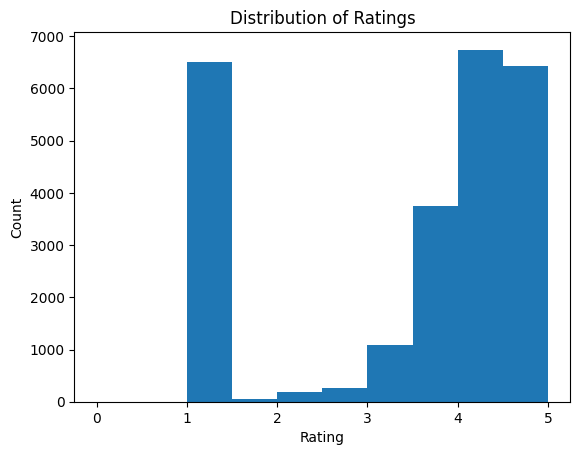

In [62]:
# create a histogram of the ratings
plt.hist(RCdata1['ratings'], bins=10, range=(0,5))
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.show()


<ipython-input-63-8289c715ba59>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=RCdata1, x='ratings', shade=True)


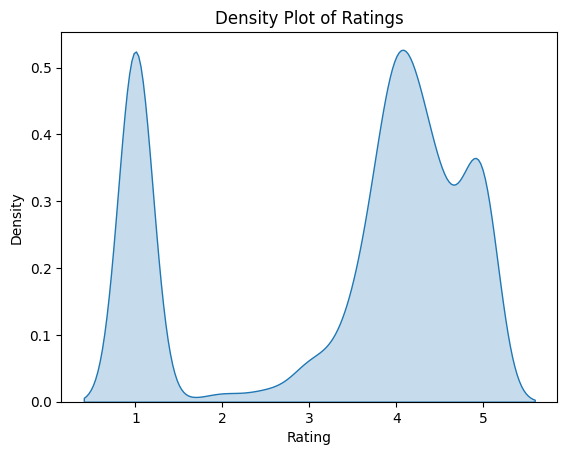

In [63]:
# create a density plot
sns.kdeplot(data=RCdata1, x='ratings', shade=True)

# set plot title and axis labels
plt.title('Density Plot of Ratings')
plt.xlabel('Rating')
plt.ylabel('Density')

# display the plot
plt.show()

In [64]:
# Count the number of restaurants with reviews more than 500
more_than_500 = (RCdata1['reviews'] > 500).sum()

# Count the number of restaurants with reviews less than or equal to 500
less_than_500 = (RCdata1['reviews'] <= 500).sum()

# Print the results
print(f"Number of restaurants with more than 500 reviews: {more_than_500}")
print(f"Number of restaurants with less than or equal to 500 reviews: {less_than_500}")


Number of restaurants with more than 500 reviews: 3394
Number of restaurants with less than or equal to 500 reviews: 21606


In [65]:
# Count the number of restaurants with reviews more than 100
more_than_100 = (RCdata1['reviews'] > 100).sum()

# Count the number of restaurants with reviews less than or equal to 100
less_than_100 = (RCdata1['reviews'] <= 100).sum()

# Print the results
print(f"Number of restaurants with more than 100 reviews: {more_than_100}")
print(f"Number of restaurants with less than or equal to 100 reviews: {less_than_100}")


Number of restaurants with more than 100 reviews: 6305
Number of restaurants with less than or equal to 100 reviews: 18695


In [66]:
# Count the number of restaurants with reviews more than 500
more_than_50 = (RCdata1['reviews'] > 50).sum()

# Count the number of restaurants with reviews less than or equal to 500
less_than_50 = (RCdata1['reviews'] <= 50).sum()

# Print the results
print(f"Number of restaurants with more than 50 reviews: {more_than_50}")
print(f"Number of restaurants with less than or equal to 50 reviews: {less_than_50}")


Number of restaurants with more than 50 reviews: 7770
Number of restaurants with less than or equal to 50 reviews: 17230


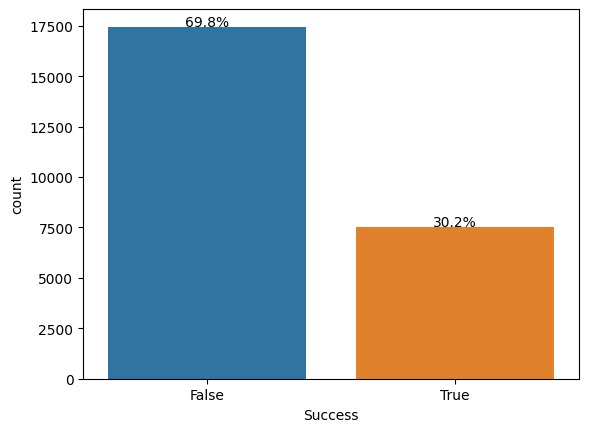

In [67]:
# create success column
RCdata1['Success'] = (RCdata1['ratings'] >= 3.5) & (RCdata1['reviews'] > 50)

# Create a countplot
ax = sns.countplot(x='Success', data=RCdata1)

# Get the total number of observations
total = len(RCdata1['Success'])

# Loop through the bars
for p in ax.patches:
    # Get the height of the bar
    height = p.get_height()
    # Calculate the percentage
    percentage = '{:.1f}%'.format((height/total)*100)
    # Add the percentage to the plot
    ax.text(x=p.get_x() + p.get_width() / 2,
            y=height + 5,
            s=percentage,
            ha='center')


# Step 3: Split of Train and Test Datasets

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Split data into X and y
X = RCdata1.drop('Success', axis=1)
y = RCdata1['Success']

# Split into train and test datasets with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [69]:
X_train.isnull().sum()

category                    0
veg/Nveg                    0
postal_code                 0
reviews                     0
reviews_per_score_1      5107
reviews_per_score_2      5107
reviews_per_score_3      5107
reviews_per_score_4      5107
reviews_per_score_5      5107
photos_count                0
business_status             0
verified                    0
zone_density                0
Delivery                    0
Takeaway                    0
Toilets                     0
Casual                      0
Coffee                      0
Healthy Options             0
Women owned                 0
Accepts Reservations        0
CostForTwo_Rs           15807
ratings                     0
Inclusive                   0
Drinks Available            0
Kids_friendly               0
Audience_Engagement         0
Food Serving style          0
Ambient Seating             0
Website                     0
dtype: int64

In [70]:
X_test.isnull().sum()

category                   0
veg/Nveg                   0
postal_code                0
reviews                    0
reviews_per_score_1     1294
reviews_per_score_2     1294
reviews_per_score_3     1294
reviews_per_score_4     1294
reviews_per_score_5     1294
photos_count               0
business_status            0
verified                   0
zone_density               0
Delivery                   0
Takeaway                   0
Toilets                    0
Casual                     0
Coffee                     0
Healthy Options            0
Women owned                0
Accepts Reservations       0
CostForTwo_Rs           3932
ratings                    0
Inclusive                  0
Drinks Available           0
Kids_friendly              0
Audience_Engagement        0
Food Serving style         0
Ambient Seating            0
Website                    0
dtype: int64

I later did one hot encoding 

# Step 4 : EDA (Exploratory Data Analysis)

Problem Statement

Want to open a food start-up

1. What kind do I open?
2. Where should I open ?
3. What should be my key features for my start-up ?
4. What cuisine should I be serving ?
5. What is the key difference(s) between successful and unsuccessful cafes.


In [71]:
# Plot formatting

def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.0f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)


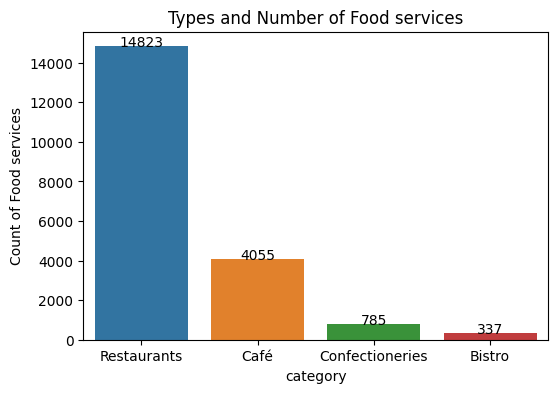

In [72]:
# Exploring the types of Food services and the count of each of them in bangalore

plt.figure(figsize=(6,4))
ax1 = sns.countplot(x="category",  data=X_train, order = X_train['category'].value_counts().index)
plt.title("Types and Number of Food services")
plt.ylabel("Count of Food services")
plt.xlabel("category")
show_values_on_bars(ax1)

Assuming any Cafe or Restaurant with rating of 3.5 and above is Successful - Drop the rows without a rating when deciding which one to open and when deciding successful or not. I also considered the establishments whihc have more than 100 reviews

<ipython-input-73-736b506c1312>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=cafes, x='ratings', shade=True, color='green')


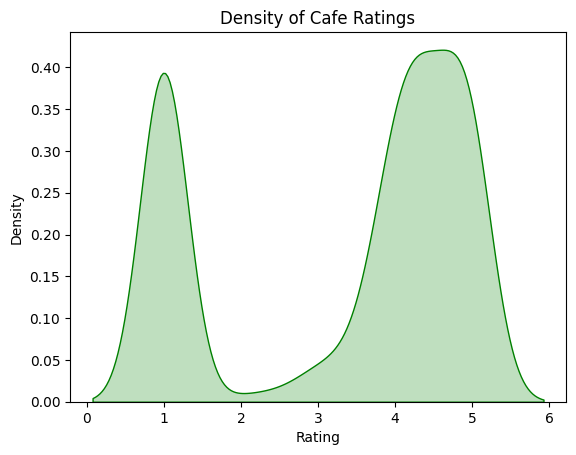

<ipython-input-73-736b506c1312>:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=restaurants, x='ratings', shade=True, color='red')


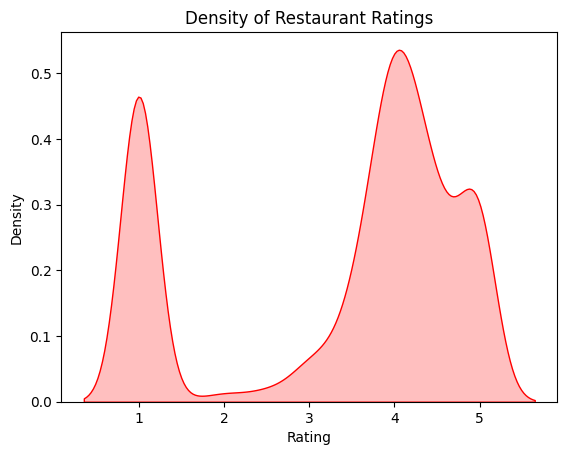

In [73]:
# Review density for the Cfaes and Restaurants

# split the data into cafes and restaurants
cafes =X_train[X_train['category'] == 'Café']
restaurants = X_train[X_train['category'] == 'Restaurants']

# Plot density of cafe ratings
sns.kdeplot(data=cafes, x='ratings', shade=True, color='green')
plt.title('Density of Cafe Ratings')
plt.xlabel('Rating')
plt.ylabel('Density')
plt.show()

# Plot density of restaurant ratings
sns.kdeplot(data=restaurants, x='ratings', shade=True, color='red')
plt.title('Density of Restaurant Ratings')
plt.xlabel('Rating')
plt.ylabel('Density')
plt.show()

In [74]:
#Analysing the reviews

# calculate the mean
mean_reviews = X_train['reviews'].mean()

# calculate the median
median_reviews = X_train['reviews'].median()

# calculate the mode
mode_reviews = X_train['reviews'].mode()[0]

print(f"Mean: {mean_reviews}")
print(f"Median: {median_reviews}")
print(f"Mode: {mode_reviews}")

Mean: 433.13595
Median: 7.0
Mode: 1.0


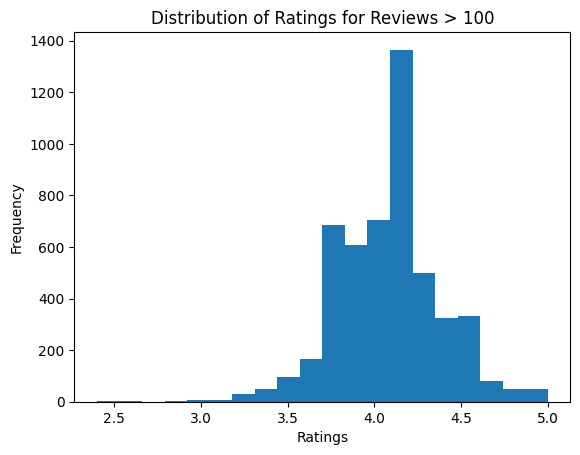

<ipython-input-75-d2de04bacd3e>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=filtered_data2, x='ratings', shade=True, color='red')


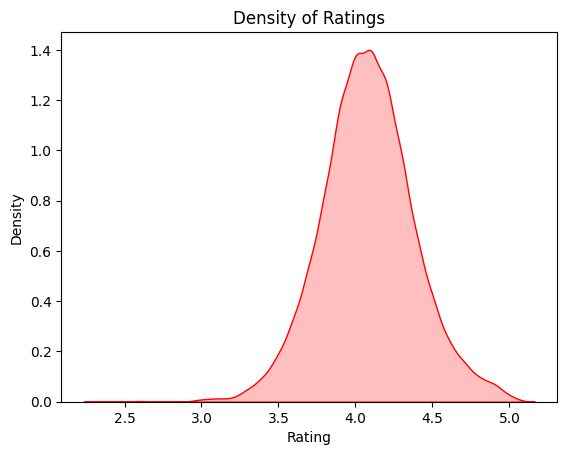

In [75]:
# filter the data to get reviews greater than 100
filtered_data2 = X_train[X_train['reviews'] > 100]

# create a histogram of the ratings column
plt.hist(filtered_data2['ratings'], bins=20)
plt.title('Distribution of Ratings for Reviews > 100')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()

#density plot
sns.kdeplot(data=filtered_data2, x='ratings', shade=True, color='red')
plt.title('Density of Ratings')
plt.xlabel('Rating')
plt.ylabel('Density')
plt.show()

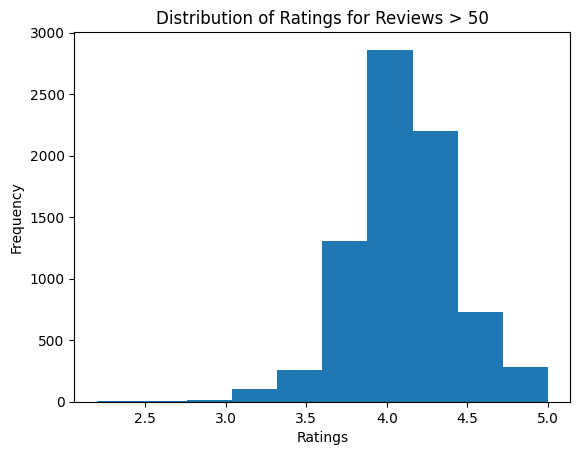

<ipython-input-76-8ec734af2d03>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=filtered_data2, x='ratings', shade=True, color='red')


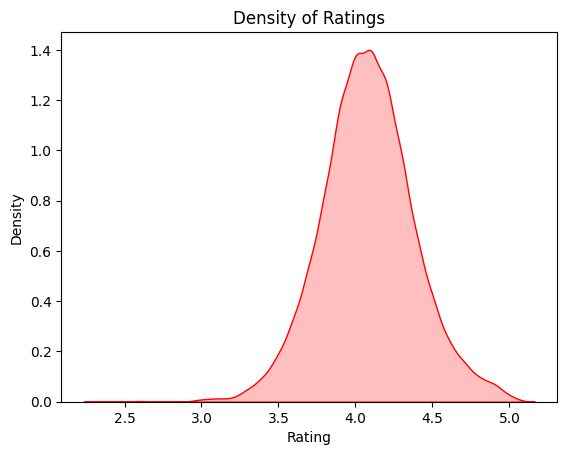

In [76]:
# filter the data to get reviews greater than 50
filtered_data1 = RCdata1[RCdata1['reviews'] > 50]

# create a histogram of the ratings column
plt.hist(filtered_data1['ratings'], bins=10)
plt.title('Distribution of Ratings for Reviews > 50')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()

#density plot
sns.kdeplot(data=filtered_data2, x='ratings', shade=True, color='red')
plt.title('Density of Ratings')
plt.xlabel('Rating')
plt.ylabel('Density')
plt.show()

<ipython-input-77-ca32b3dbbf55>:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cafes['reviews'], shade=True, color='red')


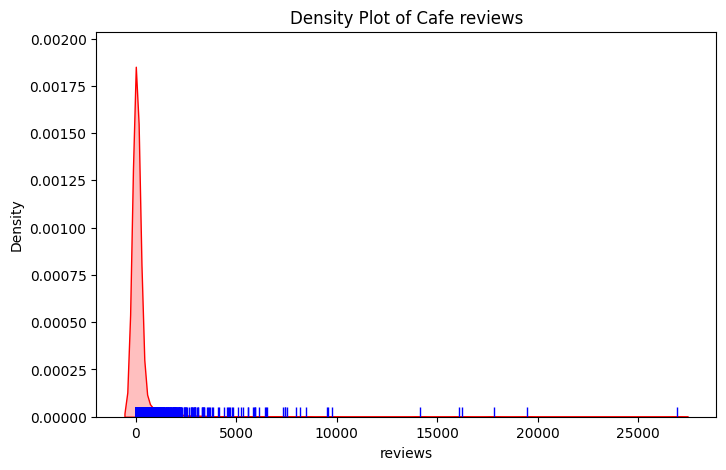

<ipython-input-77-ca32b3dbbf55>:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(restaurants['reviews'], shade=True, color='green')


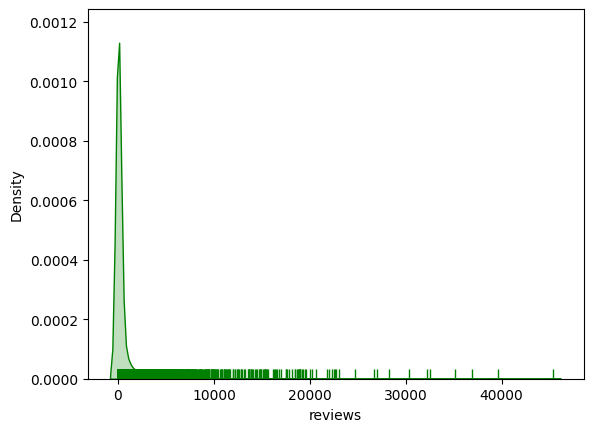

In [77]:
# Review density of Cafes and Restaurants

# split the data into cafes and restaurants
cafes = X_train[X_train['category'] == 'Café']
restaurants = X_train[X_train['category'] == 'Restaurants']

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the density curve for cafes
sns.kdeplot(cafes['reviews'], shade=True, color='red')
sns.rugplot(cafes['reviews'], color='blue')
ax.set_title('Density Plot of Cafe reviews')
ax.set_xlabel('reviews')
ax.set_ylabel('Density')
plt.show()

# Plot the density curve for restaurants
sns.kdeplot(restaurants['reviews'], shade=True, color='green')
sns.rugplot(restaurants['reviews'], color='green')
ax.set_title('Density Plot of Restaurant reviews')
ax.set_xlabel('reviews')
ax.set_ylabel('Density')
plt.show()

Analyzing all the Columns for an overall view

In [78]:
X_train.dtypes

category                category
veg/Nveg                category
postal_code             category
reviews                  float64
reviews_per_score_1      float64
reviews_per_score_2      float64
reviews_per_score_3      float64
reviews_per_score_4      float64
reviews_per_score_5      float64
photos_count             float64
business_status         category
verified                    bool
zone_density             float64
Delivery                    bool
Takeaway                    bool
Toilets                     bool
Casual                      bool
Coffee                      bool
Healthy Options             bool
Women owned                 bool
Accepts Reservations        bool
CostForTwo_Rs            float64
ratings                  float64
Inclusive                   bool
Drinks Available            bool
Kids_friendly               bool
Audience_Engagement         bool
Food Serving style      category
Ambient Seating             bool
Website                     bool
dtype: obj

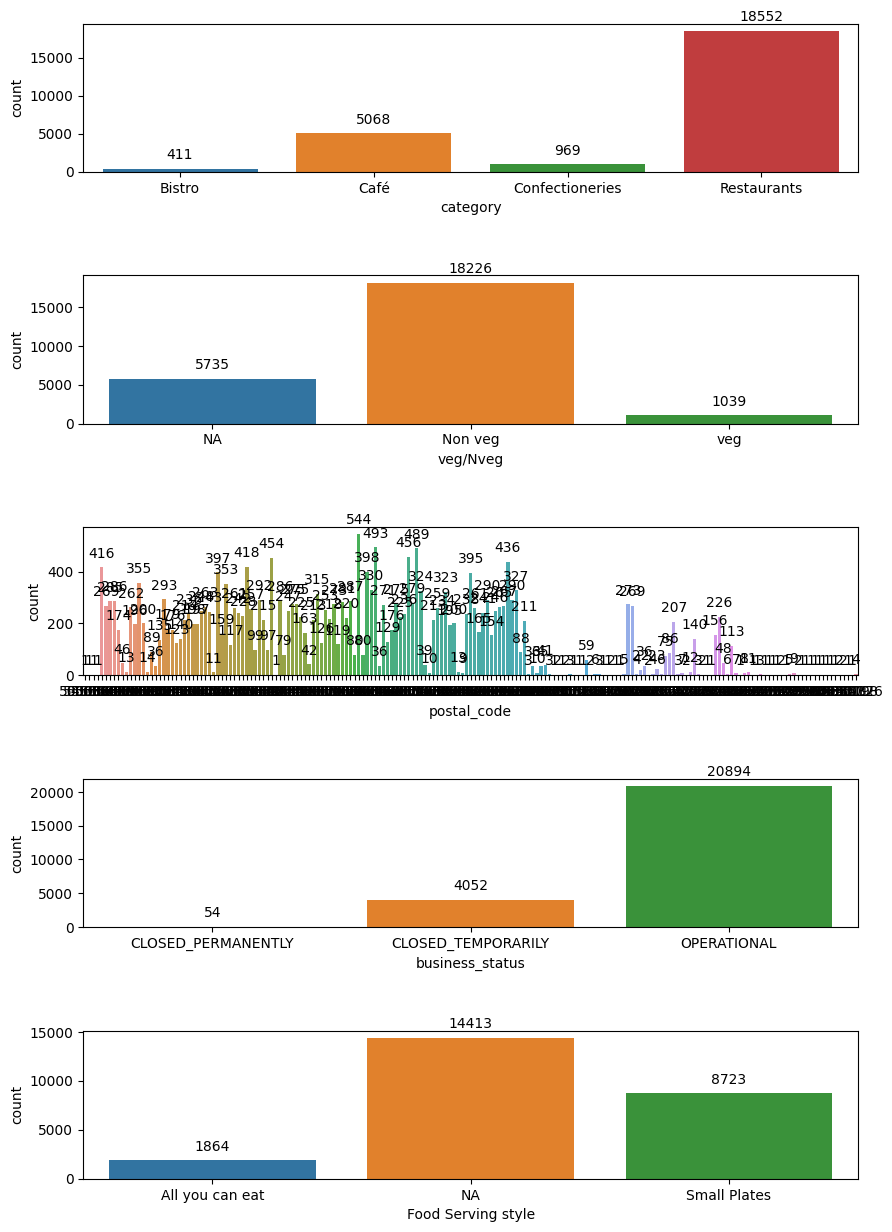

In [79]:
# Select all categorical columns

cat_cols = X_train.select_dtypes(include=['category']).columns

# Plot the countplots
fig, axes = plt.subplots(nrows=len(cat_cols), figsize=(10, 15))
for col, ax in zip(cat_cols, axes):
    sns.countplot(x=col, data=RCdata1, ax=ax)
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
        
plt.subplots_adjust(hspace=0.7)


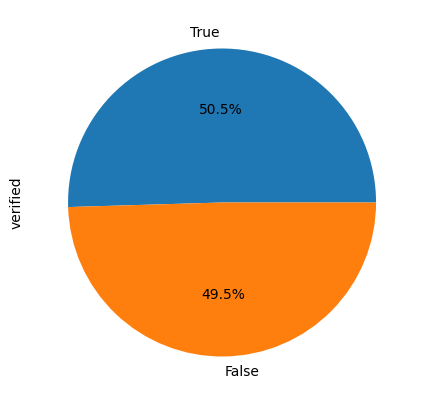

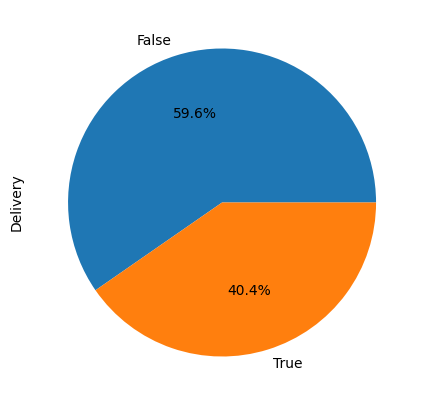

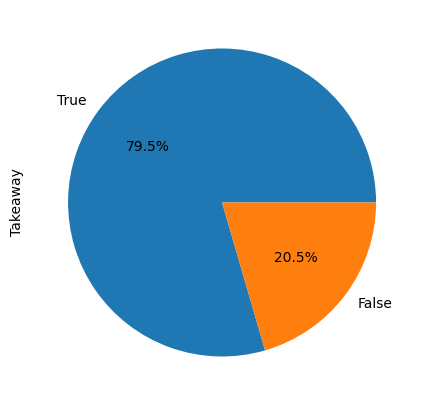

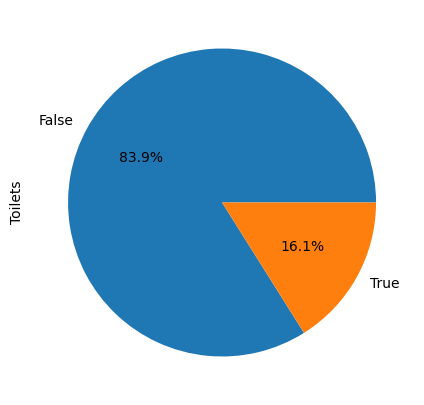

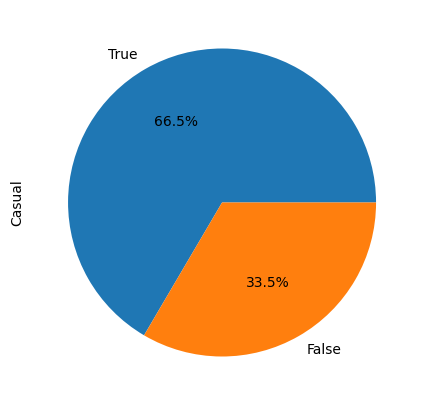

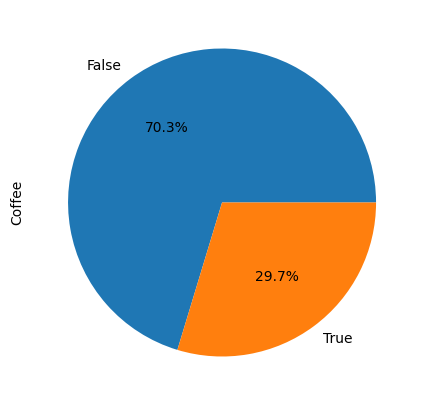

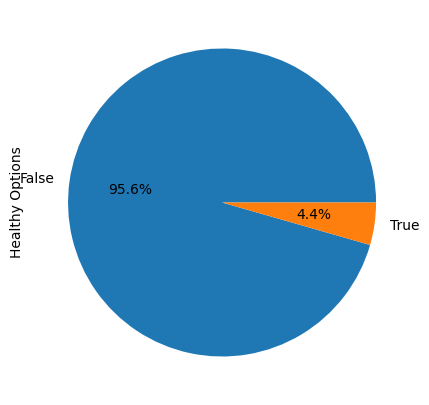

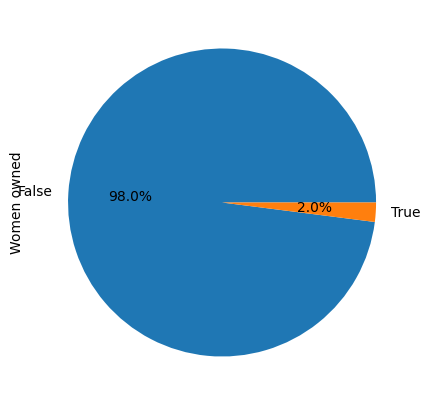

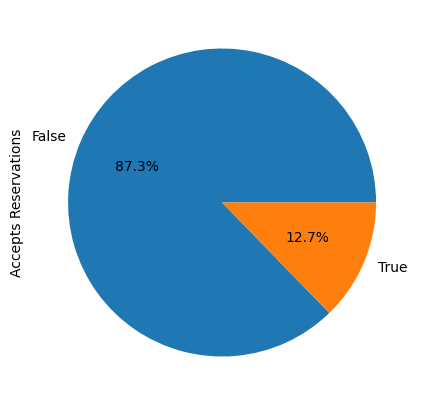

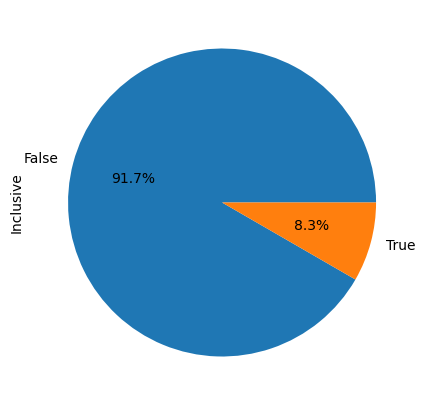

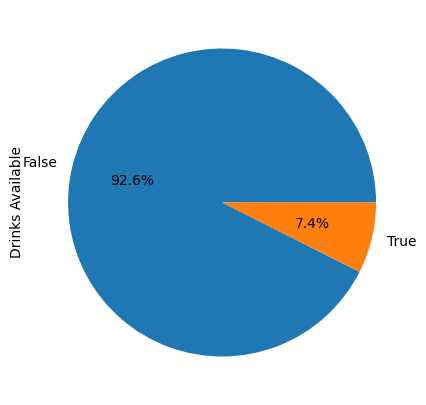

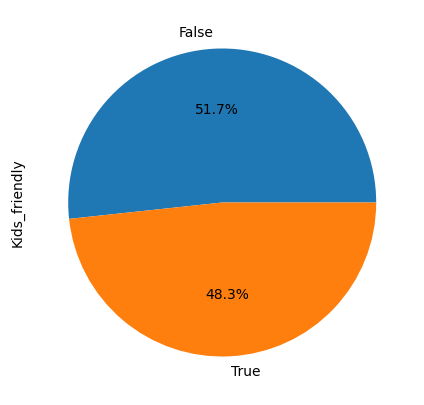

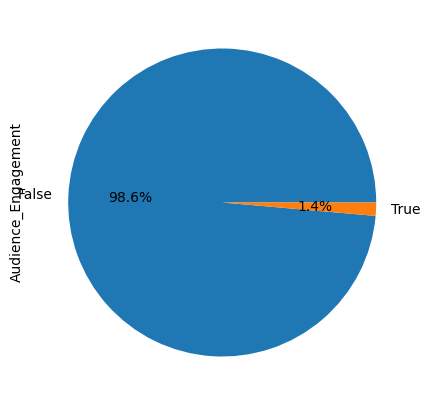

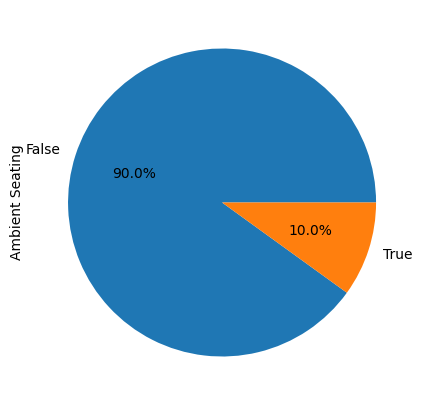

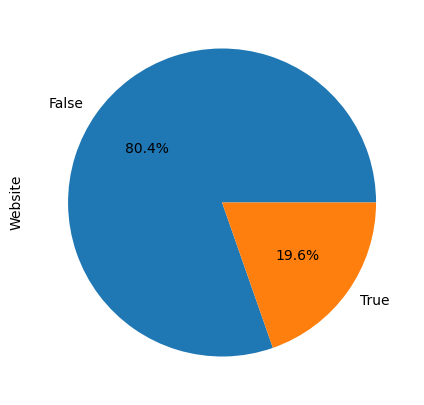

In [80]:
# Pie charts for all boolean columns

bool_cols = X_train.select_dtypes(include='bool').columns.tolist()

for col in bool_cols:
    plt.figure(figsize=(5,5))
    RCdata1[col].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.show()


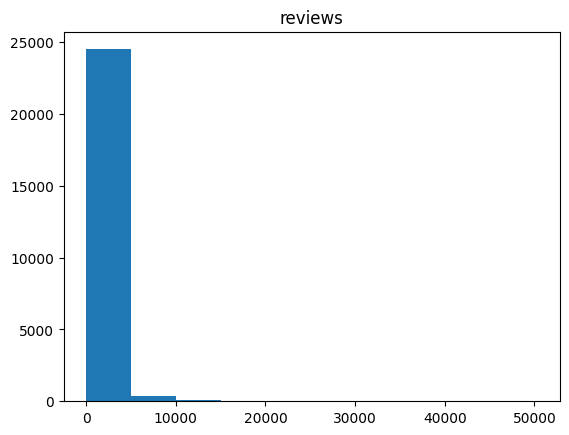

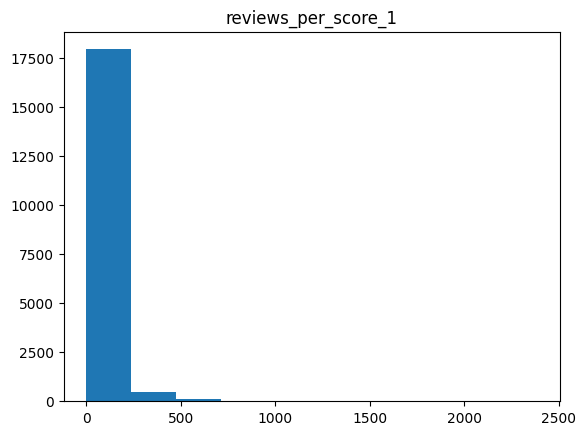

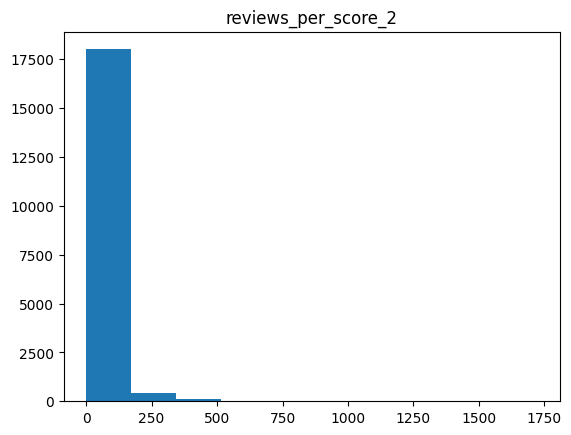

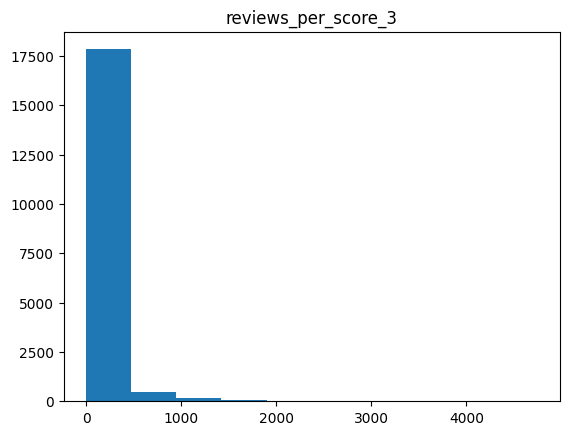

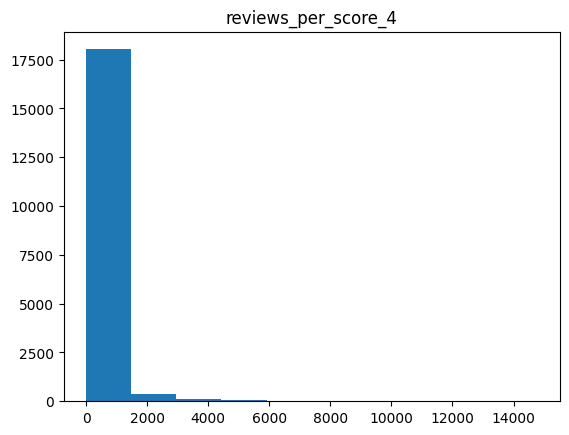

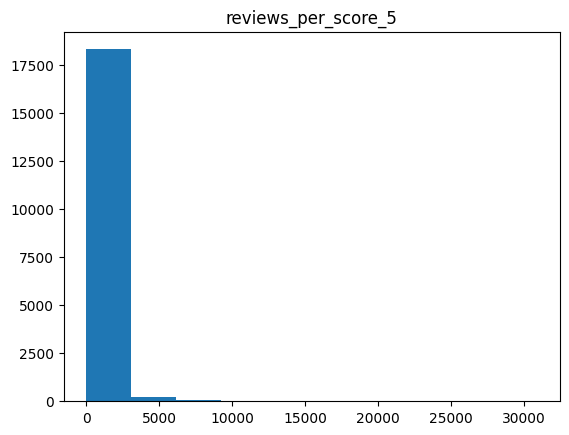

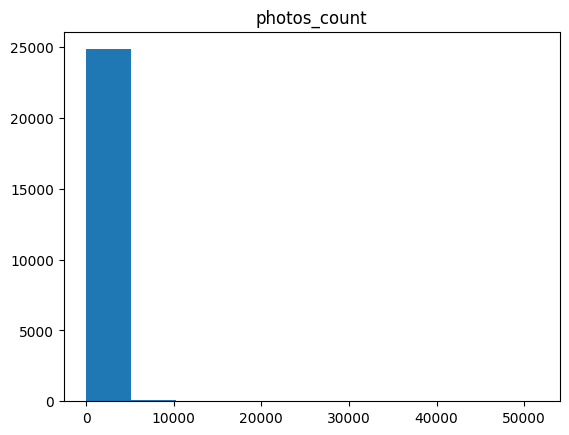

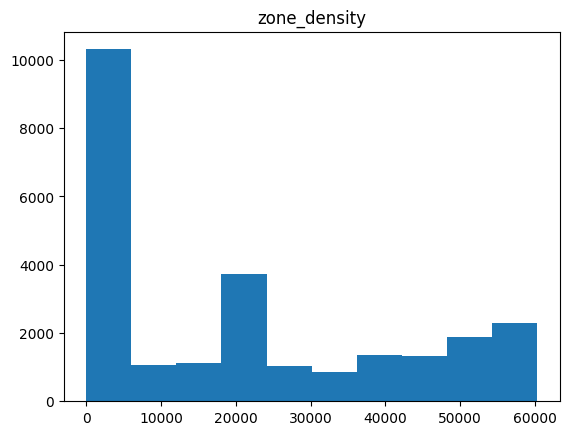

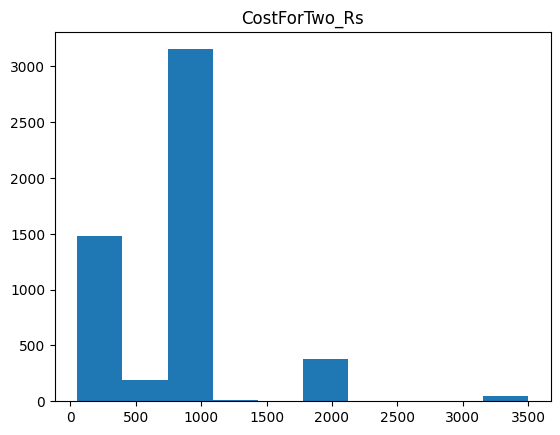

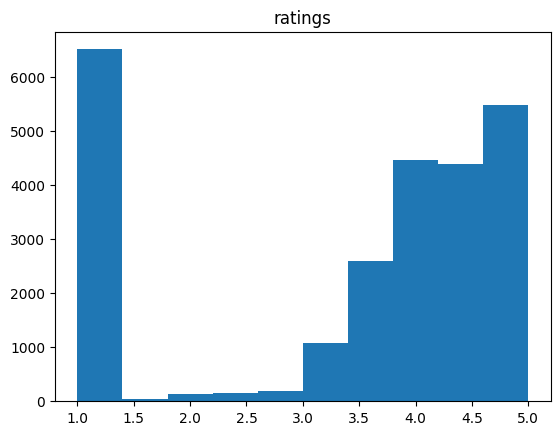

In [81]:
import matplotlib.pyplot as plt

float_cols = X_train.select_dtypes(include=['float'])

for col in float_cols:
    plt.hist(RCdata1[col], bins=10)
    plt.title(col)
    plt.show()


## 4.1 Exploring the correlations

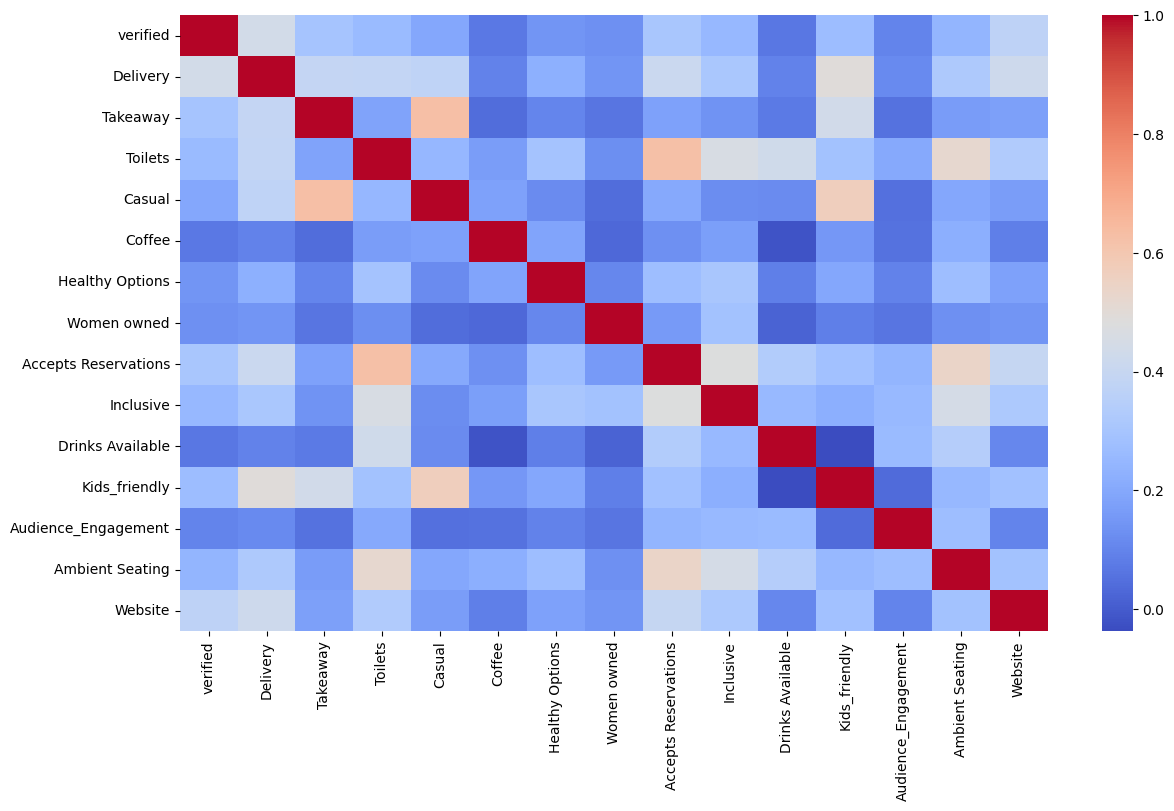

In [82]:
# Select only the numeric columns
cols =X_train.select_dtypes(include=['bool'])

# Calculate the correlation coefficients
corr_matrix = cols.corr()

# Create a mask for the correlations less than 0.2 and greater than -0.8
#mask = np.zeros_like(corr_matrix, dtype=bool)
#mask[np.triu_indices_from(mask)] = True
#mask[np.abs(corr_matrix) < 0.2] = False
#mask[np.abs((corr_matrix >= -0.1) & (corr_matrix <= 0.1))] = False

# Visualize the results with a heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(corr_matrix, cmap='coolwarm')
#sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, mask=mask, fmt='.2f')
plt.show()

<ipython-input-83-c4ad43f904f6>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = cols.corr()


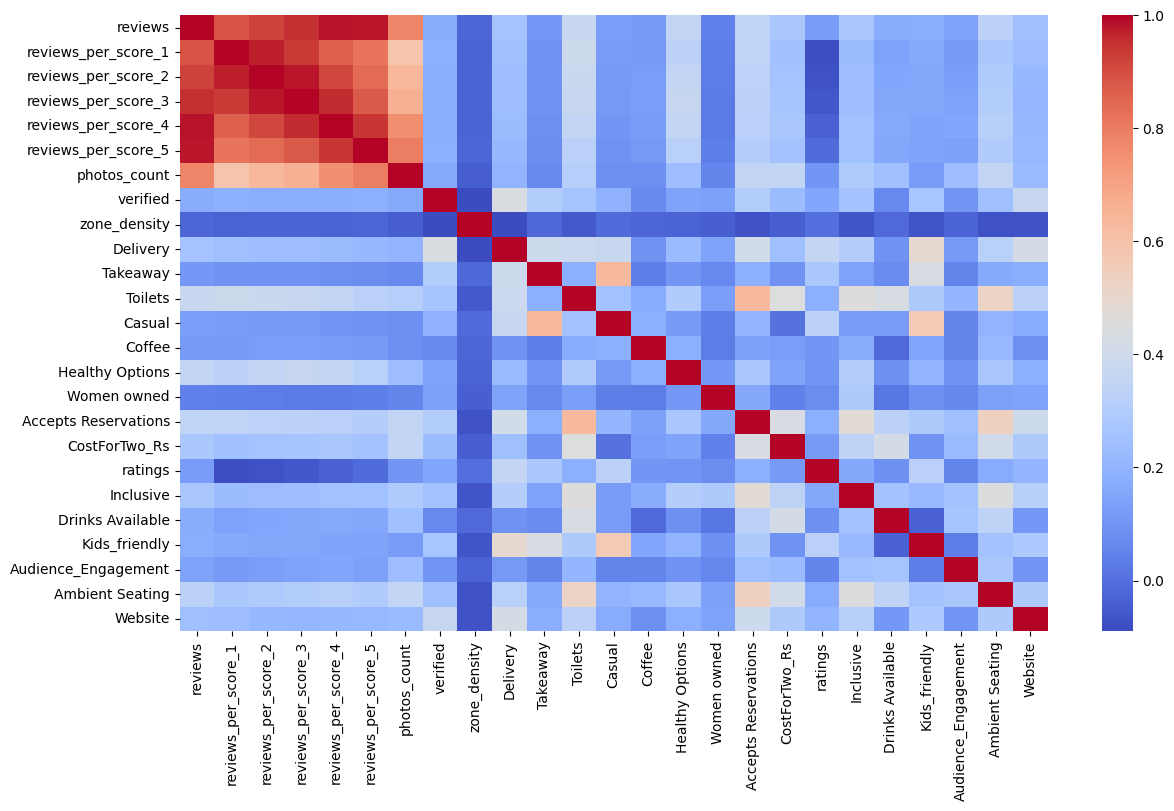

In [83]:
# Select only the numeric columns
cols = X_train.select_dtypes(include=['float','bool','category'])

# Calculate the correlation coefficients
corr_matrix = cols.corr()

# Visualize the results with a heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.show()

the correlation coefficient between two categorical columns may not be meaningful because there is no inherent ordering or distance between categories.

In [84]:
#better to remove the reviews_per score columns during analysis

X_train = X_train.drop(['reviews_per_score_1','reviews_per_score_2','reviews_per_score_3','reviews_per_score_4','reviews_per_score_5'],axis=1)

In [85]:
# Since the columns hvae been dropped from Train

X_test = X_test.drop(['reviews_per_score_1', 'reviews_per_score_2', 'reviews_per_score_3', 'reviews_per_score_4', 'reviews_per_score_5'], axis=1)


<ipython-input-86-e72a39e4c762>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = cols.corr()


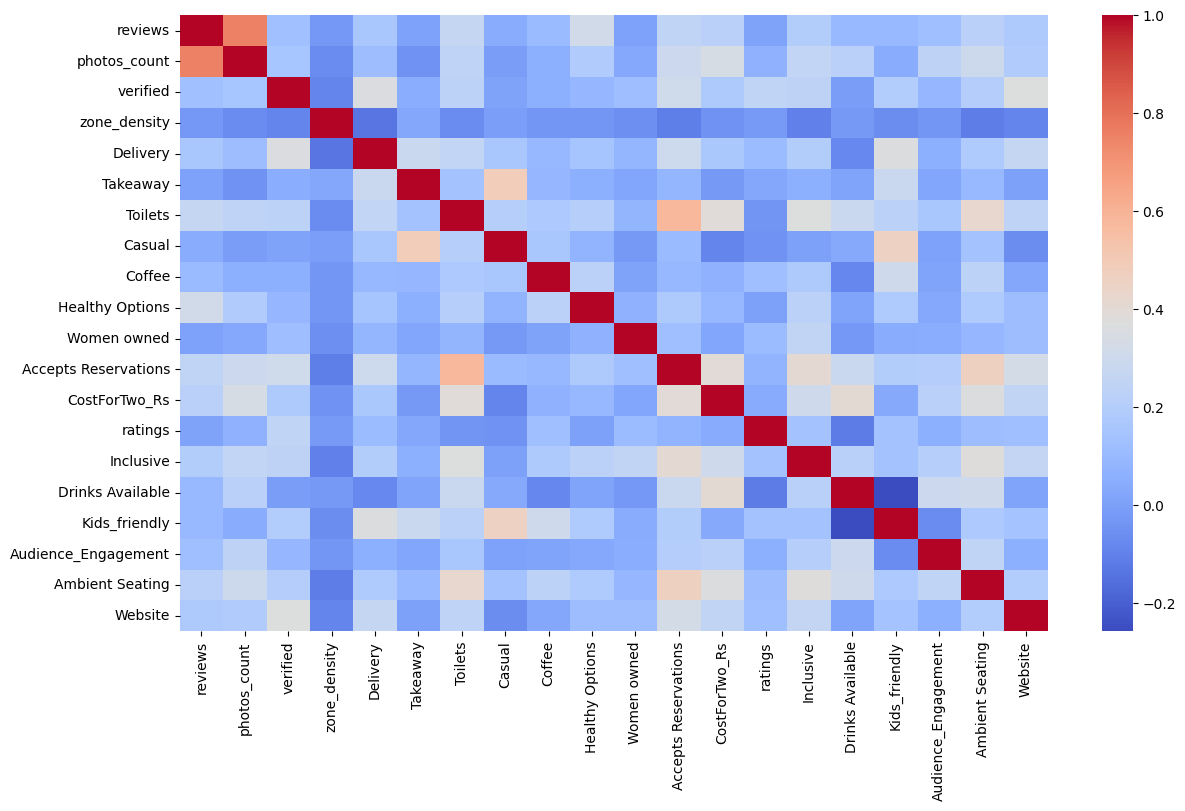

In [86]:
# Create a subset of the data where reviews > 50
subset = X_train[X_train["reviews"] > 50]

# Select only the numeric columns
cols = subset.select_dtypes(include=['float','bool','category'])

# Calculate the correlation coefficients
corr_matrix = cols.corr()

# Visualize the results with a heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.show()

Assumption - Want to remove the bias incurred due to ratings which are 4 or 5 but have only very few reviews

<ipython-input-87-7d4d516da277>:22: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,1)
<ipython-input-87-7d4d516da277>:31: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,2)


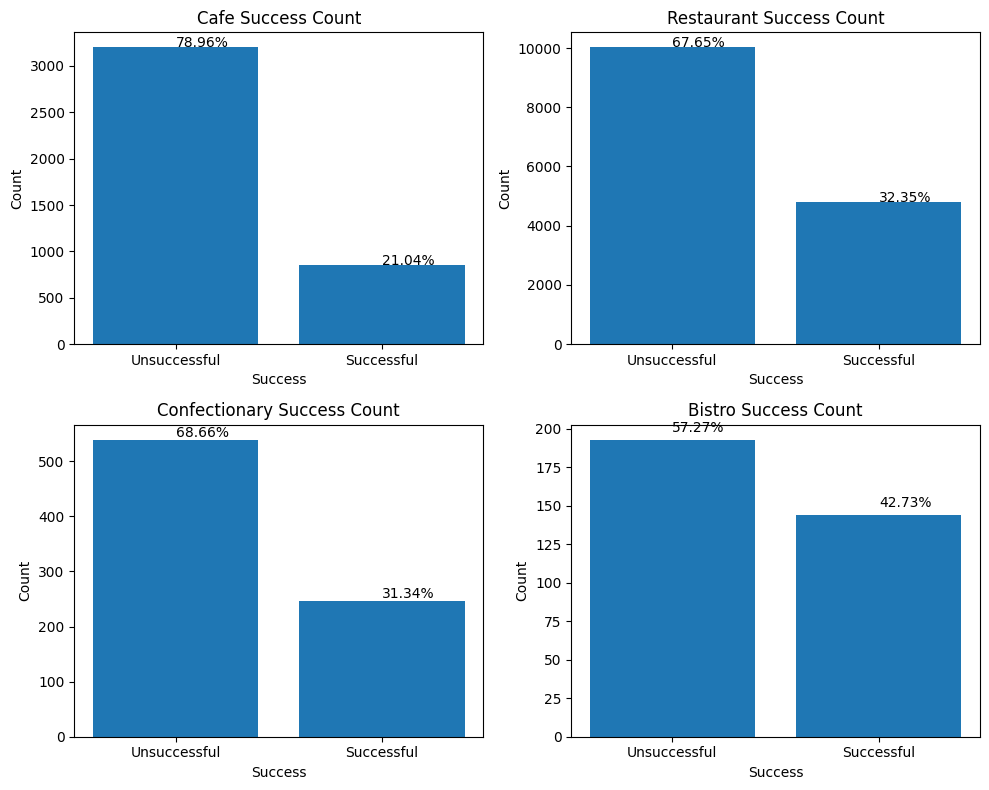

In [87]:
# split data into cafes, restaurants, confectionaries, and bistro
cafes = X_train[X_train['category'] == 'Café']
restaurants = X_train[X_train['category'] == 'Restaurants']
confectionaries = X_train[X_train['category'] == 'Confectioneries']
bistro = X_train[X_train['category'] == 'Bistro']

# Group the above by success
cafes_grouped = cafes.groupby(y_train).size()
restaurants_grouped = restaurants.groupby(y_train).size()
confectionaries_grouped = confectionaries.groupby(y_train).size()
bistro_grouped = bistro.groupby(y_train).size()

# Calculate the percentage values
cafes_perc = cafes_grouped/len(cafes)*100
restaurants_perc = restaurants_grouped/len(restaurants)*100
confectionaries_perc = confectionaries_grouped/len(confectionaries)*100
bistro_perc = bistro_grouped/len(bistro)*100

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(10, 8))

# Plot the bar chart for cafes
plt.subplot(2,2,1)
plt.bar(["Unsuccessful", "Successful"], cafes_grouped.values)
plt.title("Cafe Success Count")
plt.xlabel("Success")
plt.ylabel("Count")
for i, v in enumerate(cafes_grouped):
    plt.text(i, v+5, f"{round(cafes_perc[i], 2)}%")
    
# Plot the bar chart for restaurants
plt.subplot(2,2,2)
plt.bar(["Unsuccessful", "Successful"], restaurants_grouped.values)
plt.title("Restaurant Success Count")
plt.xlabel("Success")
plt.ylabel("Count")
for i, v in enumerate(restaurants_grouped):
    plt.text(i, v+5, f"{round(restaurants_perc[i], 2)}%")

# Plot the bar chart for confectionaries
plt.subplot(2,2,3)
plt.bar(["Unsuccessful", "Successful"], confectionaries_grouped.values)
plt.title("Confectionary Success Count")
plt.xlabel("Success")
plt.ylabel("Count")
for i, v in enumerate(confectionaries_grouped):
    plt.text(i, v+5, f"{round(confectionaries_perc[i], 2)}%")

# Plot the bar chart for bistro
plt.subplot(2,2,4)
plt.bar(["Unsuccessful", "Successful"], bistro_grouped.values)
plt.title("Bistro Success Count")
plt.xlabel("Success")
plt.ylabel("Count")
for i, v in enumerate(bistro_grouped):
    plt.text(i, v+5, f"{round(bistro_perc[i], 2)}%")

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()


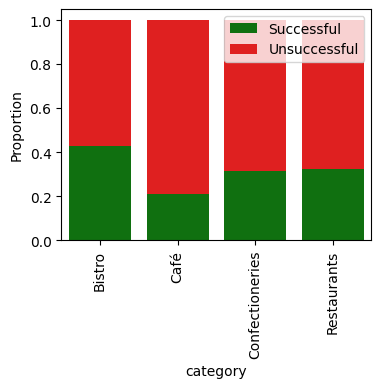

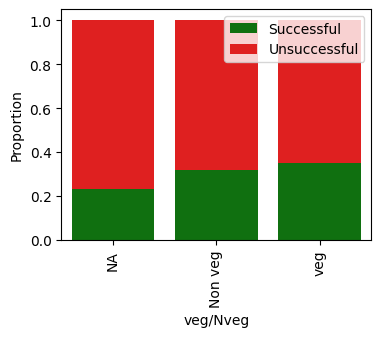

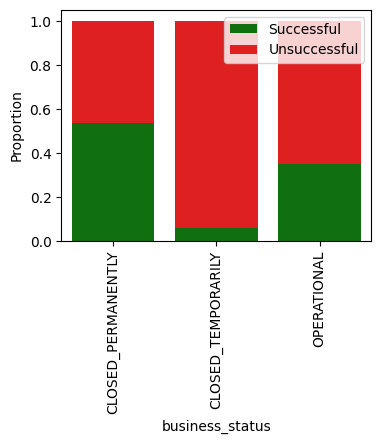

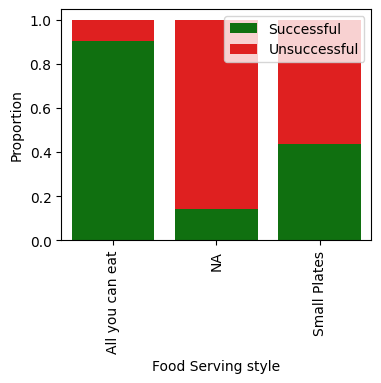

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

# Subset the categorical columns
cat_cols = ['category', 'veg/Nveg', 'business_status', 'Food Serving style']

# Loop over the categorical columns
for col in cat_cols:
    # Create a crosstab of the column and the target variable
    ct = pd.crosstab(X_train[col], y_train, normalize='index')
    
    # Create a stacked bar chart
    plt.figure(figsize=(4,3))
    sns.barplot(x=ct.index, y=ct[True], color='green', label='Successful')
    sns.barplot(x=ct.index, y=ct[False], color='red', bottom=ct[True], label='Unsuccessful')
    plt.xticks(rotation=90)
    plt.xlabel(col)
    plt.ylabel('Proportion')
    plt.legend()
    plt.show()


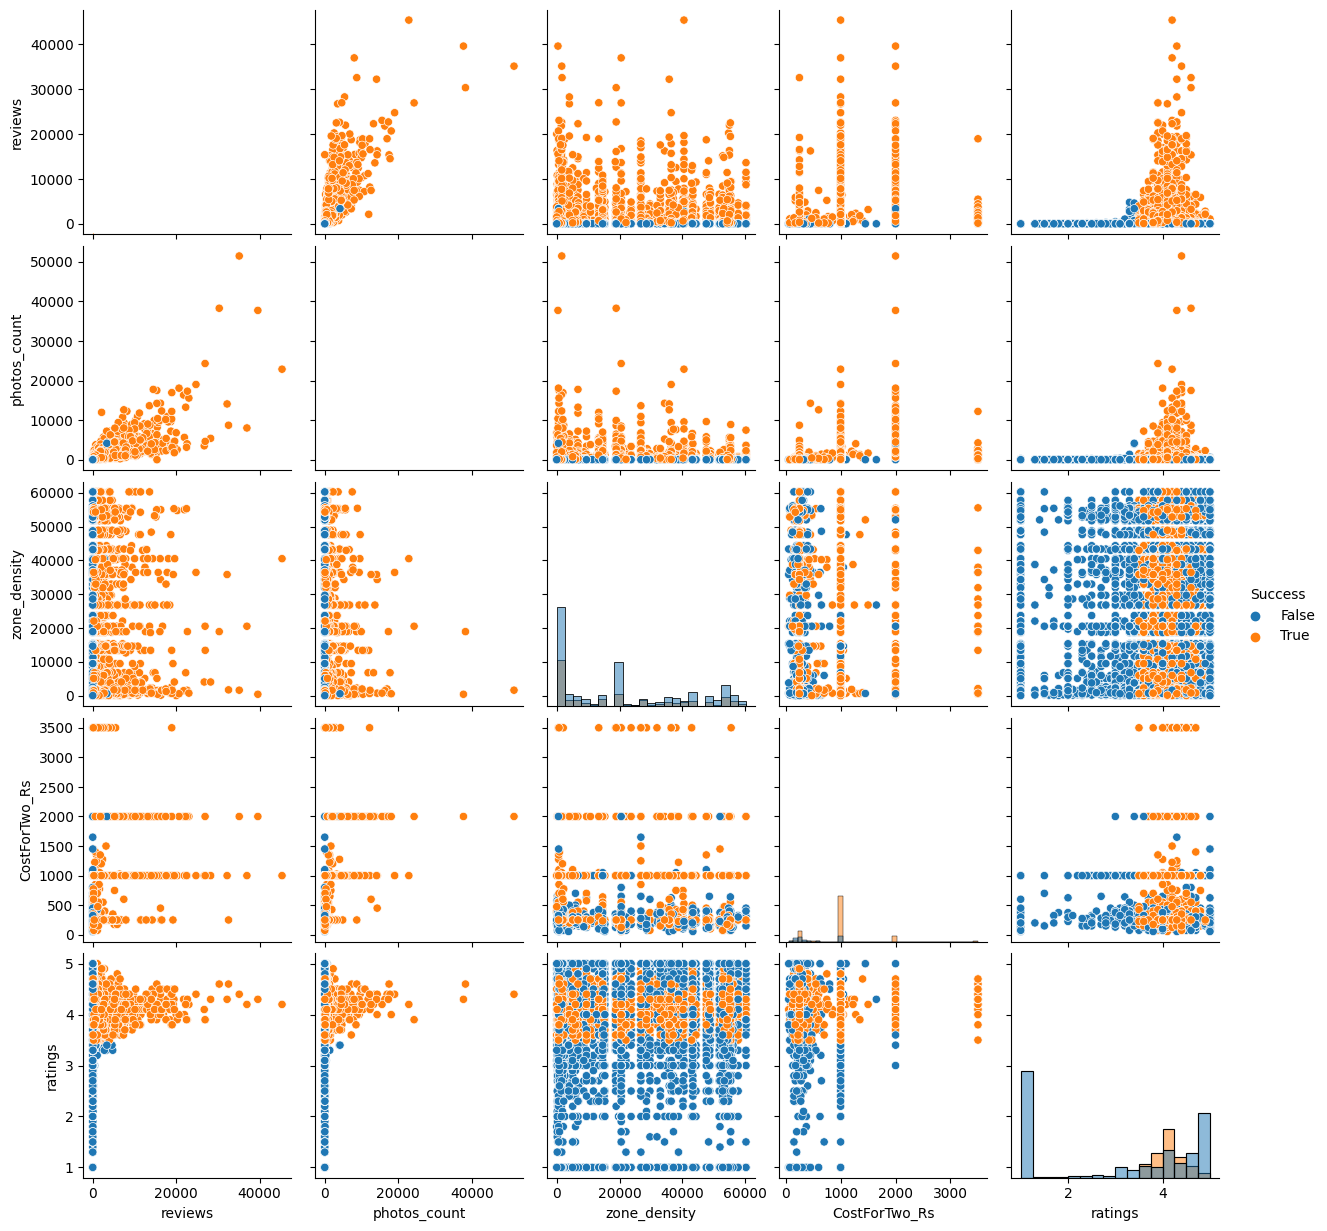

In [89]:
# Select only the numeric columns
cols = X_train.select_dtypes(include=['float'])

# Combine the numeric columns and the target variable column
df_train = pd.concat([cols, y_train], axis=1)

# Create scatter plots for all pairs of columns
sns.pairplot(df_train, vars=cols.columns, hue='Success', diag_kind='hist')
plt.show()

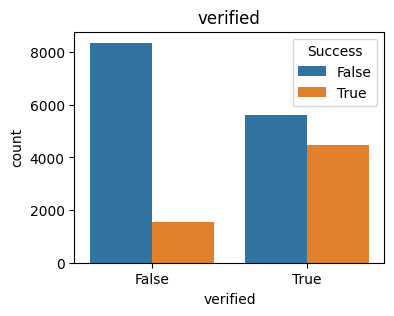

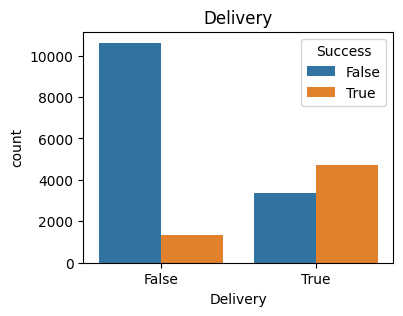

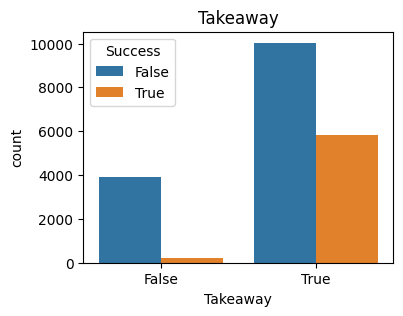

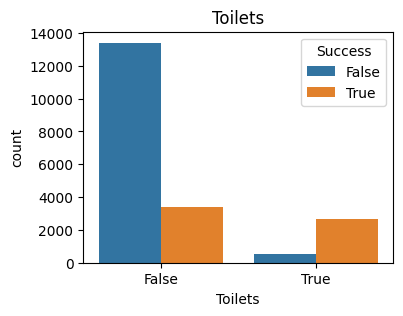

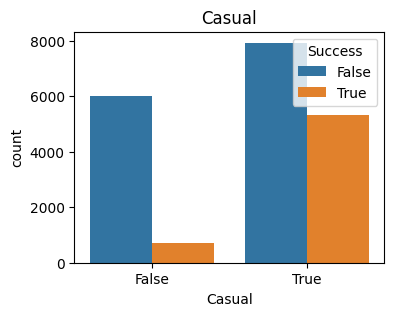

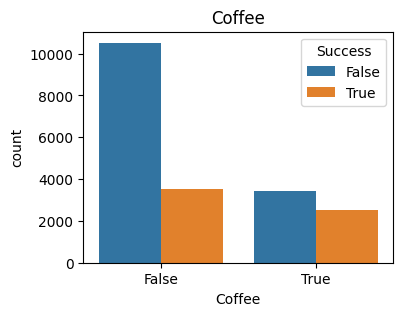

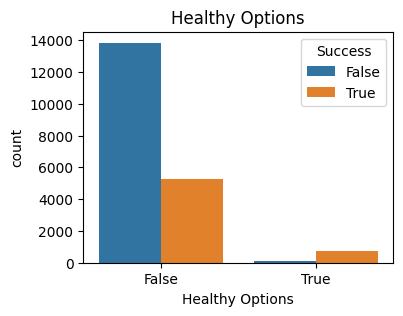

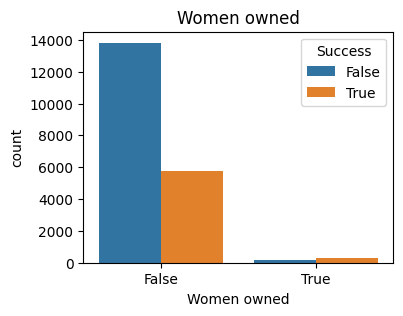

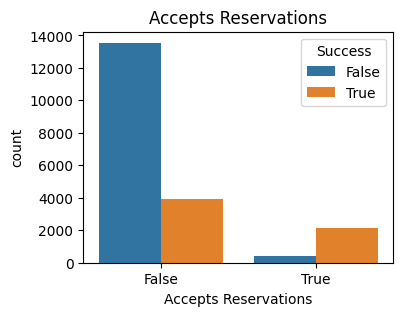

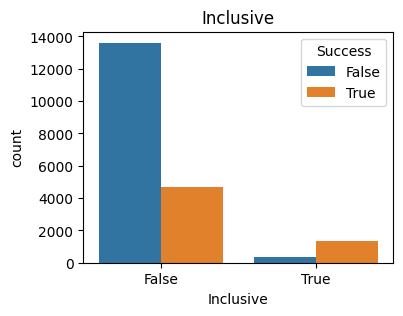

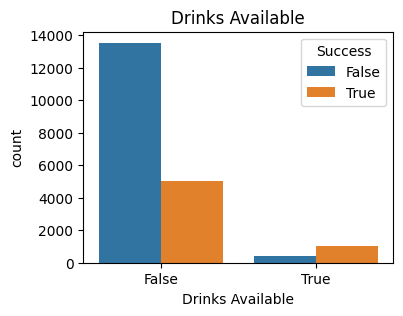

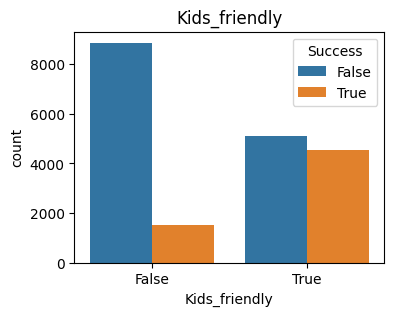

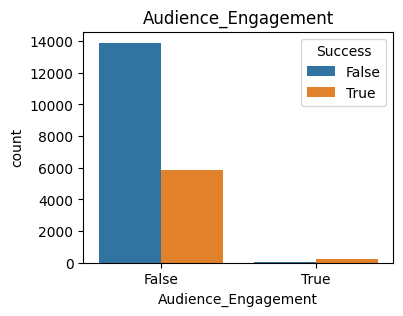

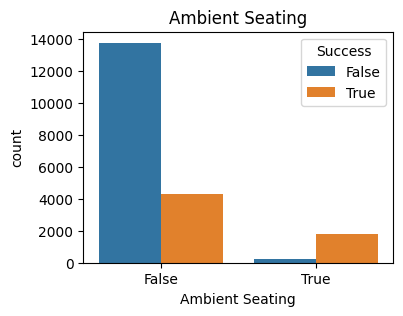

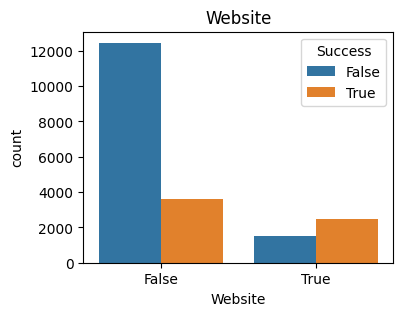

In [90]:
bool_cols = X_train.select_dtypes(include=['bool']).columns.tolist()

for col in bool_cols:
    if col != 'Success':
        plt.figure(figsize=(4,3))
        sns.countplot(x=col, hue='Success', data=X_train.join(y_train))
        plt.title(col)
        plt.show()


In [91]:
X_train = X_train.drop(['CostForTwo_Rs'],axis=1) # too many missing values

In [92]:
X_test = X_test.drop(['CostForTwo_Rs'],axis=1) # since we have dropped it from train

In [93]:
X_train = X_train.drop(['reviews','ratings'],axis=1) # Since the category of Success has been created form these

In [94]:
X_test = X_test.drop(['reviews','ratings'],axis=1) # Since the columns have been dropped from Train

In [95]:
X_train.shape

(20000, 22)

In [96]:
X_test.shape

(5000, 22)

In [97]:
missing_cols_train = X_train.columns[X_train.isna().any()].tolist()
print(missing_cols_train)

[]


In [98]:
missing_cols_test = X_test.columns[X_test.isna().any()].tolist()
print(missing_cols_test)

[]


One Hot encoding 

There are many entries in postal code column in dataset. some of these maynot reflet in test dataset. This will create different numbers of columns in the training and test datasets. The model will not be able to find the same columns in the test dataset as in the training dataset, and may not be able to make accurate predictions.

So am combining train and test, one hot encoding them and again splitting them back

In [99]:
# Define categorical and boolean column lists
cat_cols = list(X_train.select_dtypes(include=['category']).columns)
bool_cols = list(X_train.select_dtypes(include=['bool']).columns)

# Concatenate training and test data
combined_data = pd.concat([X_train, X_test])

# One-hot encode categorical columns
combined_data_encoded = pd.get_dummies(combined_data, columns=cat_cols)
combined_data_encoded[bool_cols] = combined_data_encoded[bool_cols].astype(int)

# Split back into training and test data
train_data_encoded = combined_data_encoded[:len(X_train)]
test_data_encoded = combined_data_encoded[len(X_train):]

# Concatenate one-hot encoded categorical columns with boolean columns
X_train_encoded = pd.concat([train_data_encoded, X_train[bool_cols].astype(int)], axis=1)
X_test_encoded = pd.concat([test_data_encoded, X_test[bool_cols].astype(int)], axis=1)

# Append non-categorical, non-boolean columns
X_train_encoded = pd.concat([X_train_encoded, X_train.select_dtypes(exclude=['category', 'bool'])], axis=1)
X_test_encoded = pd.concat([X_test_encoded, X_test.select_dtypes(exclude=['category', 'bool'])], axis=1)

In [100]:
X_train_encoded.shape

(20000, 234)

In [101]:
X_test_encoded.shape

(5000, 234)

In [102]:
missing_cols_train_encoded = X_train_encoded.columns[X_train_encoded.isna().any()].tolist()
print(missing_cols_train_encoded)

[]


In [103]:
missing_cols_test_encoded = X_test_encoded.columns[X_test_encoded.isna().any()].tolist()
print(missing_cols_test_encoded)

[]


In [104]:
print(X_train_encoded.info())

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, ChIJNaE8KmU9rjsRCMZOw97gmuA to ChIJd6z5iJgWrjsRAqKP6qvV5Os
Columns: 234 entries, photos_count to zone_density
dtypes: float64(4), int64(30), uint8(200)
memory usage: 9.2+ MB
None


In [105]:
print(X_test_encoded.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, ChIJ79lXu3oZrjsRqp5d3qUJIVc to ChIJr6UJVO8XrjsRnO9avA2VEVM
Columns: 234 entries, photos_count to zone_density
dtypes: float64(4), int64(30), uint8(200)
memory usage: 2.3+ MB
None


# STEP 5: Feature Scaling and Principal Component Analysis (PCA)



I first start of with Normalization since my data has columns of Zone density whihc have very high values and even the one hot encoded values of 0 and 1. So am first scaling and then doing PCA

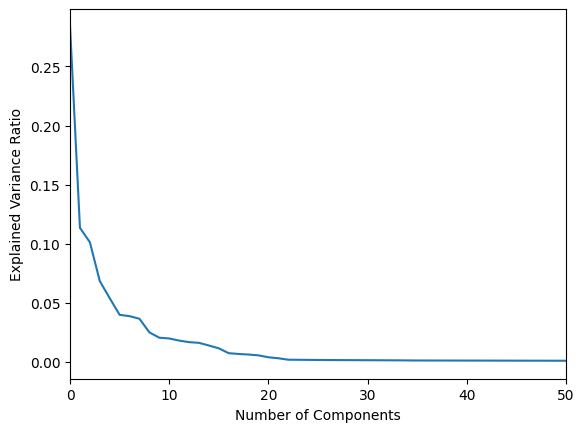

Explained variance ratio and cumulative variance ratio by number of components:
Component    Variance   Cumulative Variance
Component 1  28.43%     28.43%    
Component 2  11.34%     39.78%    
Component 3  10.13%     49.91%    
Component 4  6.84%      56.75%    
Component 5  5.39%      62.14%    
Component 6  3.98%      66.12%    
Component 7  3.87%      69.99%    
Component 8  3.65%      73.65%    
Component 9  2.50%      76.14%    
Component 10 2.05%      78.19%    
Component 11 1.98%      80.18%    
Component 12 1.80%      81.98%    
Component 13 1.67%      83.66%    
Component 14 1.62%      85.27%    
Component 15 1.39%      86.66%    
Component 16 1.15%      87.81%    
Component 17 0.74%      88.55%    
Component 18 0.67%      89.22%    
Component 19 0.63%      89.85%    
Component 20 0.55%      90.40%    
Component 21 0.39%      90.79%    
Component 22 0.31%      91.10%    
Component 23 0.19%      91.29%    
Component 24 0.18%      91.47%    
Component 25 0.18%      91.65%    
C

In [106]:
# Select only the numeric columns
numeric_cols = X_train_encoded.select_dtypes(include=['float64', 'int64','uint8']).columns.tolist()

# Scale the training data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded[numeric_cols])

# Instantiate PCA object
from sklearn.decomposition import PCA
pca = PCA()

#Fit PCA on training data
pca.fit(X_train_scaled)

X_train_Scaled_PCA = pca.transform(X_train_scaled)

# Plot explained variance ratio
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.xlim([0, 50])
plt.show()

# Get the variance explained by each component
variance = pca.explained_variance_ratio_

# Get the cumulative variance explained by each component
cumulative_variance = np.cumsum(variance)

# Create a table with the variance and cumulative variance for each component
table = []
for i in range(len(variance)):
    table.append([f"Component {i+1}", f"{variance[i]*100:.2f}%", f"{cumulative_variance[i]*100:.2f}%"])

# Print the table
print("Explained variance ratio and cumulative variance ratio by number of components:")
print("{:<12} {:<10} {:<10}".format('Component', 'Variance', 'Cumulative Variance'))
for row in table:
    print("{:<12} {:<10} {:<10}".format(*row))

In [107]:
# Choosing the number of components to keep based on the plot and explained variance ratio
n_components = 17

# Transform data using chosen number of components
X_train_scaled_pca = pca.transform(X_train_scaled)[:, :n_components]


Trying Standard Scalar - Ideally this may not work since Idont have normal distribution in my fetaure columns but trying this out

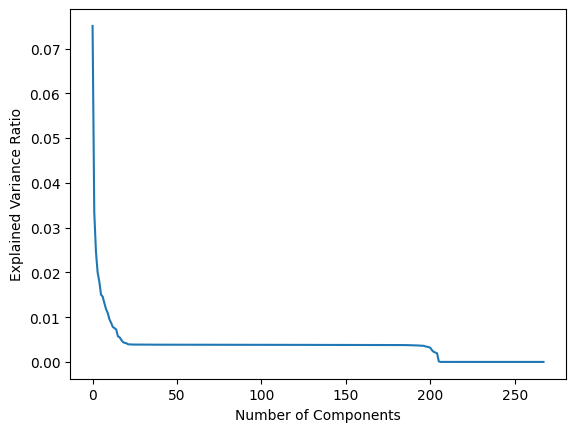

Explained variance ratio and cumulative variance ratio by number of components:
Component    Variance   Cumulative Variance
Component 1  7.51%      7.51%     
Component 2  3.35%      10.85%    
Component 3  2.46%      13.31%    
Component 4  1.99%      15.31%    
Component 5  1.79%      17.10%    
Component 6  1.50%      18.60%    
Component 7  1.46%      20.06%    
Component 8  1.31%      21.37%    
Component 9  1.18%      22.55%    
Component 10 1.09%      23.64%    
Component 11 0.95%      24.59%    
Component 12 0.87%      25.46%    
Component 13 0.78%      26.24%    
Component 14 0.75%      27.00%    
Component 15 0.73%      27.72%    
Component 16 0.57%      28.30%    
Component 17 0.55%      28.85%    
Component 18 0.49%      29.34%    
Component 19 0.44%      29.78%    
Component 20 0.42%      30.21%    
Component 21 0.42%      30.63%    
Component 22 0.39%      31.02%    
Component 23 0.39%      31.41%    
Component 24 0.39%      31.80%    
Component 25 0.39%      32.19%    
C

In [108]:
# Select only the numeric columns
numeric_cols = X_train_encoded.select_dtypes(include=['float64', 'int64','uint8']).columns.tolist()

from sklearn.preprocessing import StandardScaler
# Scale the training data
scaler = StandardScaler()
X_train_scaled1 = scaler.fit_transform(X_train_encoded[numeric_cols])

# Scale the testing data using the same scaler
X_test_scaled1 = scaler.transform(X_test_encoded[numeric_cols])

# Instantiate PCA object
pca = PCA()

# Fit PCA on training data
pca.fit(X_train_scaled1)

# Plot explained variance ratio
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

# Get the variance explained by each component
variance = pca.explained_variance_ratio_

# Get the cumulative variance explained by each component
cumulative_variance = np.cumsum(variance)

# Create a table with the variance and cumulative variance for each component
table = []
for i in range(len(variance)):
    table.append([f"Component {i+1}", f"{variance[i]*100:.2f}%", f"{cumulative_variance[i]*100:.2f}%"])

# Print the table
print("Explained variance ratio and cumulative variance ratio by number of components:")
print("{:<12} {:<10} {:<10}".format('Component', 'Variance', 'Cumulative Variance'))
for row in table:
    print("{:<12} {:<10} {:<10}".format(*row))

In [109]:
#Scaling the Test data and applying PCA

# Select only the numeric columns
numeric_cols = X_test_encoded.select_dtypes(include=['float64', 'int64','uint8']).columns.tolist()

# Scale the testing data
scaler = MinMaxScaler()
X_test_scaled = scaler.fit_transform(X_test_encoded[numeric_cols])

# Fit PCA on testing data
pca.fit(X_test_scaled)

X_test_Scaled_PCA= pca.transform(X_test_scaled)

# Choosing the number of components to keep based on the plot and explained variance ratio
n_components = 17

# Transform data using chosen number of components
X_test_scaled_pca = pca.transform(X_test_scaled)[:, :n_components]


# STEP 6: Modelling

In [110]:
# Trying with PCA and without Hyperparameters

# Trying # Import necessary libraries and modules
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

# Define the models without any hyperparameters
lr = LogisticRegression(random_state=42)
rc = RidgeClassifier(random_state=42)
knn = KNeighborsClassifier()
svm = SVC(random_state=42)
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)


# Fit the models on the transformed data
lr.fit(X_train_scaled_pca, y_train)
rc.fit(X_train_scaled_pca, y_train)
knn.fit(X_train_scaled_pca, y_train)
svm.fit(X_train_scaled_pca, y_train)
rf.fit(X_train_scaled_pca, y_train)
gb.fit(X_train_scaled_pca, y_train)

# Make predictions on the test data
y_pred_lr = lr.predict(X_test_scaled_pca)
y_pred_rc = rc.predict(X_test_scaled_pca)
y_pred_knn = knn.predict(X_test_scaled_pca)
y_pred_svm = svm.predict(X_test_scaled_pca)
y_pred_rf = rf.predict(X_test_scaled_pca)
y_pred_gb = gb.predict(X_test_scaled_pca)

# Evaluate the performance of each model on the test data
acc_lr = accuracy_score(y_test, y_pred_lr)
acc_rc = accuracy_score(y_test, y_pred_rc)
acc_knn = accuracy_score(y_test, y_pred_knn)
acc_svm = accuracy_score(y_test, y_pred_svm)
acc_rf = accuracy_score(y_test, y_pred_rf)
acc_gb = accuracy_score(y_test, y_pred_gb)

print("Accuracy of Logistic Regression:", acc_lr)
print("Accuracy of Ridge Classifier:", acc_rc)
print("Accuracy of K-Nearest Neighbors:", acc_knn)
print("Accuracy of SVM:", acc_svm)
print("Accuracy of Random Forest:", acc_rf)
print("Accuracy of Gradient Boosting:", acc_gb)

print("\nLogistic Regression:\n", classification_report(y_test, y_pred_lr))
print("\nConfusion Matrix for Logistic Regression:\n", confusion_matrix(y_test, y_pred_lr))

print("\nRidge Classifier:\n", classification_report(y_test, y_pred_rc))
print("\nConfusion Matrix for Ridge Classifier:\n", confusion_matrix(y_test, y_pred_rc))

print("\nK-Nearest Neighbors:\n", classification_report(y_test, y_pred_knn))
print("\nConfusion Matrix for K-Nearest Neighbors:\n", confusion_matrix(y_test, y_pred_knn))

print("\nSVM:\n", classification_report(y_test, y_pred_svm))
print("\nConfusion Matrix for SVM:\n", confusion_matrix(y_test, y_pred_svm))

print("\nRandom Forest:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix for Random Forest:\n", confusion_matrix(y_test, y_pred_rf))

print("\nGradient Boosting:\n", classification_report(y_test, y_pred_gb))
print("\nConfusion Matrix for Gradient Boosting:\n", confusion_matrix(y_test, y_pred_gb))

# ROC curve and AUC
# ROC curve and AUC for all models
models = [lr, rc, knn, svm, rf, gb]
model_names = ['Logistic Regression', 'Ridge Classifier', 'K-Nearest Neighbors', 'SVM', 'Random Forest', 'Gradient Boosting']

for i, model in enumerate(models):
    y_pred = model.predict(X_test_scaled_pca)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    print("\n{} ROC curve and AUC".format(model_names[i]))
    print("Area under the ROC curve: {:.2f}".format(roc_auc))


Accuracy of Logistic Regression: 0.8158
Accuracy of Ridge Classifier: 0.8142
Accuracy of K-Nearest Neighbors: 0.8076
Accuracy of SVM: 0.8066
Accuracy of Random Forest: 0.7738
Accuracy of Gradient Boosting: 0.833

Logistic Regression:
               precision    recall  f1-score   support

       False       0.84      0.91      0.87      3491
        True       0.74      0.60      0.66      1509

    accuracy                           0.82      5000
   macro avg       0.79      0.76      0.77      5000
weighted avg       0.81      0.82      0.81      5000


Confusion Matrix for Logistic Regression:
 [[3167  324]
 [ 597  912]]

Ridge Classifier:
               precision    recall  f1-score   support

       False       0.83      0.93      0.87      3491
        True       0.77      0.55      0.64      1509

    accuracy                           0.81      5000
   macro avg       0.80      0.74      0.76      5000
weighted avg       0.81      0.81      0.80      5000


Confusion Matrix fo

In [111]:
#Trying without PCA and without Hyperparameters

# Define the models without any hyperparameters
lr1 = LogisticRegression(random_state=42)
rc1 = RidgeClassifier(random_state=42)
knn1 = KNeighborsClassifier()
svm1 = SVC(random_state=42)
rf1 = RandomForestClassifier(random_state=42)
gb1 = GradientBoostingClassifier(random_state=42)

# Fit the models on the transformed data
lr1.fit(X_train_scaled, y_train)
rc1.fit(X_train_scaled, y_train)
knn1.fit(X_train_scaled, y_train)
svm1.fit(X_train_scaled, y_train)
rf1.fit(X_train_scaled, y_train)
gb1.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_lr1 = lr1.predict(X_test_scaled)
y_pred_rc1 = rc1.predict(X_test_scaled)
y_pred_knn1 = knn1.predict(X_test_scaled)
y_pred_svm1 = svm1.predict(X_test_scaled)
y_pred_rf1 = rf1.predict(X_test_scaled)
y_pred_gb1 = gb1.predict(X_test_scaled)

# Evaluate the performance of each model on the test data
acc_lr1 = accuracy_score(y_test, y_pred_lr1)
acc_rc1 = accuracy_score(y_test, y_pred_rc1)
acc_knn1 = accuracy_score(y_test, y_pred_knn1)
acc_svm1 = accuracy_score(y_test, y_pred_svm1)
acc_rf1 = accuracy_score(y_test, y_pred_rf1)
acc_gb1 = accuracy_score(y_test, y_pred_gb1)

print("Accuracy of Logistic Regression:", acc_lr1)
print("Accuracy of Ridge Classifier:", acc_rc1)
print("Accuracy of K-Nearest Neighbors:", acc_knn1)
print("Accuracy of SVM:", acc_svm1)
print("Accuracy of Random Forest:", acc_rf1)
print("Accuracy of Gradient Boosting:", acc_gb1)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of Logistic Regression: 0.846
Accuracy of Ridge Classifier: 0.8416
Accuracy of K-Nearest Neighbors: 0.8432
Accuracy of SVM: 0.8532
Accuracy of Random Forest: 0.8836
Accuracy of Gradient Boosting: 0.8932


PCA is not working - Loss of some critical information, size of dataset. So remove PCA and contiue with Modelling

## 6.1HyperParameter Tuning

### 6.1.1 Logistic Regression

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

lr_params = {'C': [0.1, 1, 10], 'max_iter': [100, 1000, 10000]}


lr2 = LogisticRegression(random_state=42)

lr_gs = GridSearchCV(lr2, lr_params, cv=5)

lr_gs.fit(X_train_scaled, y_train)

y_pred_lr2 = lr_gs.predict(X_test_scaled)

acc_lr2 = accuracy_score(y_test, y_pred_lr2)

#Accuracy of Model
print("Accuracy of Logistic Regression:", acc_lr2)

# Classification report and Confusion Matrix
print("\nLogistic Regression:\n", classification_report(y_test, y_pred_lr))
print("\nConfusion Matrix for Logistic Regression:\n", confusion_matrix(y_test, y_pred_lr))

# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lr2)
roc_auc = roc_auc_score(y_test, y_pred)
print("\n ROC curve and AUC")
print("Area under the ROC curve: {:.2f}".format(roc_auc))



/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Accuracy of Logistic Regression: 0.8576

Logistic Regression:
               precision    recall  f1-score   support

       False       0.84      0.91      0.87      3491
        True       0.74      0.60      0.66      1509

    accuracy                           0.82      5000
   macro avg       0.79      0.76      0.77      5000
weighted avg       0.81      0.82      0.81      5000


Confusion Matrix for Logistic Regression:
 [[3167  324]
 [ 597  912]]

 ROC curve and AUC
Area under the ROC curve: 0.78


### 6.1.2 RIdgeClassifier

In [113]:
from sklearn.linear_model import RidgeClassifier

rc_params = {'alpha': [0.1, 1, 10], 'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}

rc = RidgeClassifier(random_state=42)

rc_gs = GridSearchCV(rc, rc_params, cv=5)

rc_gs.fit(X_train_scaled, y_train)

y_pred_rc = rc_gs.predict(X_test_scaled)

acc_rc = accuracy_score(y_test, y_pred_rc)

# Accuracy of Model
print("Accuracy of Ridge Classifier:", acc_rc)

# Classification report and Confusion Matrix
print("\nRidge Classifier:\n", classification_report(y_test, y_pred_rc))
print("\nConfusion Matrix for Ridge Classifier:\n", confusion_matrix(y_test, y_pred_rc))

# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rc)
roc_auc = roc_auc_score(y_test, y_pred_rc)
print("\n ROC curve and AUC")
print("Area under the ROC curve: {:.2f}".format(roc_auc))


Accuracy of Ridge Classifier: 0.8416

Ridge Classifier:
               precision    recall  f1-score   support

       False       0.84      0.95      0.89      3491
        True       0.83      0.60      0.69      1509

    accuracy                           0.84      5000
   macro avg       0.84      0.77      0.79      5000
weighted avg       0.84      0.84      0.83      5000


Confusion Matrix for Ridge Classifier:
 [[3307  184]
 [ 608  901]]

 ROC curve and AUC
Area under the ROC curve: 0.77


### 6.1.3 KNN Alogrithm

Text(0, 0.5, 'Mean Error')

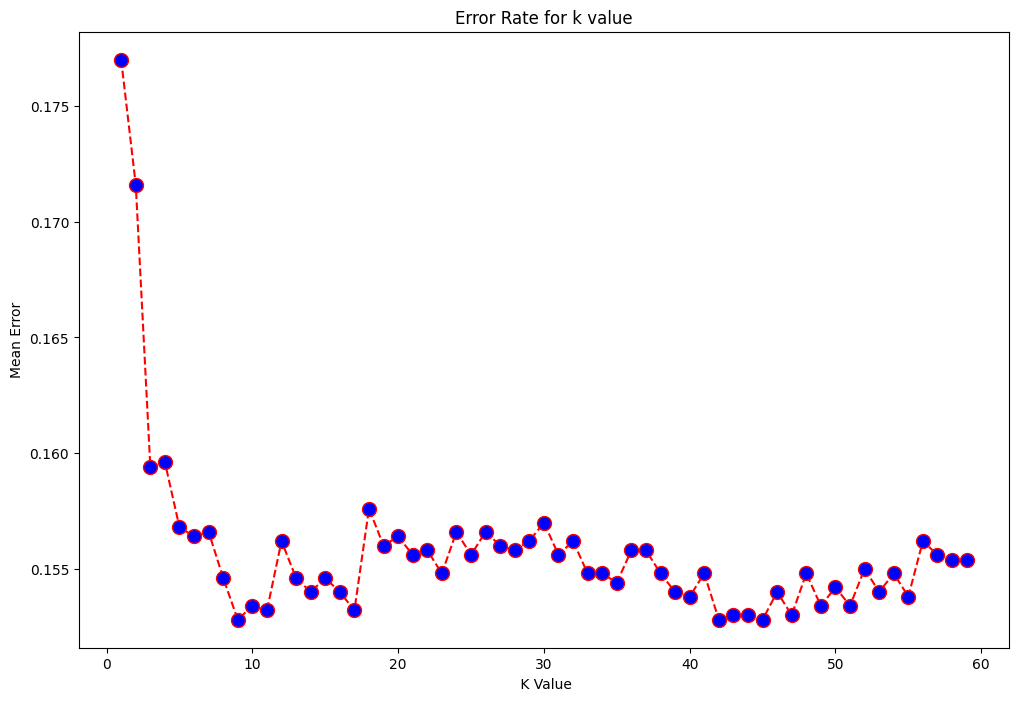

In [114]:
#KNN Algorithm

#Visualizing the Mean Error rate for K value

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

from sklearn.neighbors import KNeighborsClassifier

knn2 = KNeighborsClassifier()

error= []

#Calculating error for K values between 1 and 60
for i in range(1,60):
  knn2 = KNeighborsClassifier(n_neighbors=i)
  knn2.fit(X_train_scaled, y_train)
  pred_i=knn2.predict(X_test_scaled)
  error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 8))
plt.plot (range(1, 60), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title("Error Rate for k value")
plt.xlabel(' K Value')
plt.ylabel('Mean Error')


In [115]:
#Using GridSearch to find the best parameter for KNN

# Define the parameter grid
knn_params = {'n_neighbors': [1, 3, 5, 7, 9, 11, 12, 13, 15, 17]}

knn2 = KNeighborsClassifier()

knn_gs = GridSearchCV(knn2, knn_params, cv=5)

# Fit the grid search to the data
knn_gs.fit(X_train_scaled, y_train)

# Use the best estimator to predict on the test data
y_pred_knn2 = knn_gs.best_estimator_.predict(X_test_scaled)

# Calculate accuracy
acc_knn2 = accuracy_score(y_test, y_pred_knn2)
print("Accuracy of K-Nearest Neighbors:", acc_knn2)

# Print the best parameters
print("Best parameters:", knn_gs.best_params_)

# Classification report and Confusion Matrix
print("\nKNN:\n", classification_report(y_test, y_pred_knn2))
print("\nConfusion Matrix for KNN:\n", confusion_matrix(y_test, y_pred_knn2))

# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_knn2)
roc_auc = roc_auc_score(y_test, y_pred_knn2)
print("\n ROC curve and AUC")
print("Area under the ROC curve: {:.2f}".format(roc_auc))


Accuracy of K-Nearest Neighbors: 0.8454
Best parameters: {'n_neighbors': 13}

KNN:
               precision    recall  f1-score   support

       False       0.87      0.92      0.89      3491
        True       0.78      0.67      0.72      1509

    accuracy                           0.85      5000
   macro avg       0.83      0.80      0.81      5000
weighted avg       0.84      0.85      0.84      5000


Confusion Matrix for KNN:
 [[3209  282]
 [ 491 1018]]

 ROC curve and AUC
Area under the ROC curve: 0.80


All the below Algorithms are taking too many hours to run- Hence using the PCA data for all below Algorithms

### 6.1.4 SVM Algorithm



In [116]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Define the parameter grid for the SVM
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [0.1, 1, 10, 100]}

# Define the SVM classifier
svc = SVC(kernel='rbf')

#Perform grid search to find the best hyperparameters
Random_search = RandomizedSearchCV(svc, param_grid, cv=5, scoring='accuracy')
Random_search.fit(X_train_scaled, y_train)
print("Best parameters:", Random_search.best_params_)
print("Best cross-validation score:", Random_search.best_score_)

# Perform grid search to find the best hyperparameters
#grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')
#grid_search.fit(X_train_scaled, y_train)
#print("Best parameters:", grid_search.best_params_)
#print("Best cross-validation score:", grid_search.best_score_)


# Train SVM with best hyperparameters and evaluate on test data
svc_best = SVC(kernel='rbf', C=Random_search.best_params_['C'], gamma=Random_search.best_params_['gamma'])
svc_best.fit(X_train_scaled, y_train)
y_pred_svc = svc_best.predict(X_test_scaled)
print("Test accuracy with best hyperparameters:", svc_best.score(X_test_scaled, y_test))

# Classification report and Confusion Matrix
print("\nSVM:\n", classification_report(y_test, y_pred_svc))
print("\nConfusion Matrix for SVM:\n", confusion_matrix(y_test, y_pred_svc))

# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_svc)
roc_auc = roc_auc_score(y_test, y_pred_svc)
print("\n ROC curve and AUC")
print("Area under the ROC curve: {:.2f}".format(roc_auc))

Best parameters: {'gamma': 0.1, 'C': 1}
Best cross-validation score: 0.8568999999999999
Test accuracy with best hyperparameters: 0.8528

SVM:
               precision    recall  f1-score   support

       False       0.87      0.93      0.90      3491
        True       0.81      0.67      0.73      1509

    accuracy                           0.85      5000
   macro avg       0.84      0.80      0.82      5000
weighted avg       0.85      0.85      0.85      5000


Confusion Matrix for SVM:
 [[3256  235]
 [ 501 1008]]

 ROC curve and AUC
Area under the ROC curve: 0.80


### 6.1.5. Decision Tree Classifier

Dtreeviz - https://www.youtube.com/watch?v=SlMZqfvl5uw

check decision tree before dropping ratings and reviews

[Text(0.5, 0.875, 'x[1] <= 0.001\ngini = 0.422\nsamples = 20000\nvalue = [13962, 6038]'),
 Text(0.25, 0.625, 'x[265] <= 0.0\ngini = 0.149\nsamples = 14234\nvalue = [13081, 1153]'),
 Text(0.125, 0.375, 'x[265] <= 0.0\ngini = 0.057\nsamples = 10987\nvalue = [10665, 322]'),
 Text(0.0625, 0.125, 'gini = 0.022\nsamples = 8317\nvalue = [8224, 93]'),
 Text(0.1875, 0.125, 'gini = 0.157\nsamples = 2670\nvalue = [2441, 229]'),
 Text(0.375, 0.375, 'x[255] <= 0.5\ngini = 0.381\nsamples = 3247\nvalue = [2416, 831]'),
 Text(0.3125, 0.125, 'gini = 0.36\nsamples = 3039\nvalue = [2323, 716]'),
 Text(0.4375, 0.125, 'gini = 0.494\nsamples = 208\nvalue = [93, 115]'),
 Text(0.75, 0.625, 'x[1] <= 0.001\ngini = 0.259\nsamples = 5766\nvalue = [881, 4885]'),
 Text(0.625, 0.375, 'x[231] <= 0.5\ngini = 0.47\nsamples = 1821\nvalue = [687, 1134]'),
 Text(0.5625, 0.125, 'gini = 0.482\nsamples = 1625\nvalue = [660, 965]'),
 Text(0.6875, 0.125, 'gini = 0.238\nsamples = 196\nvalue = [27, 169]'),
 Text(0.875, 0.375, 'x

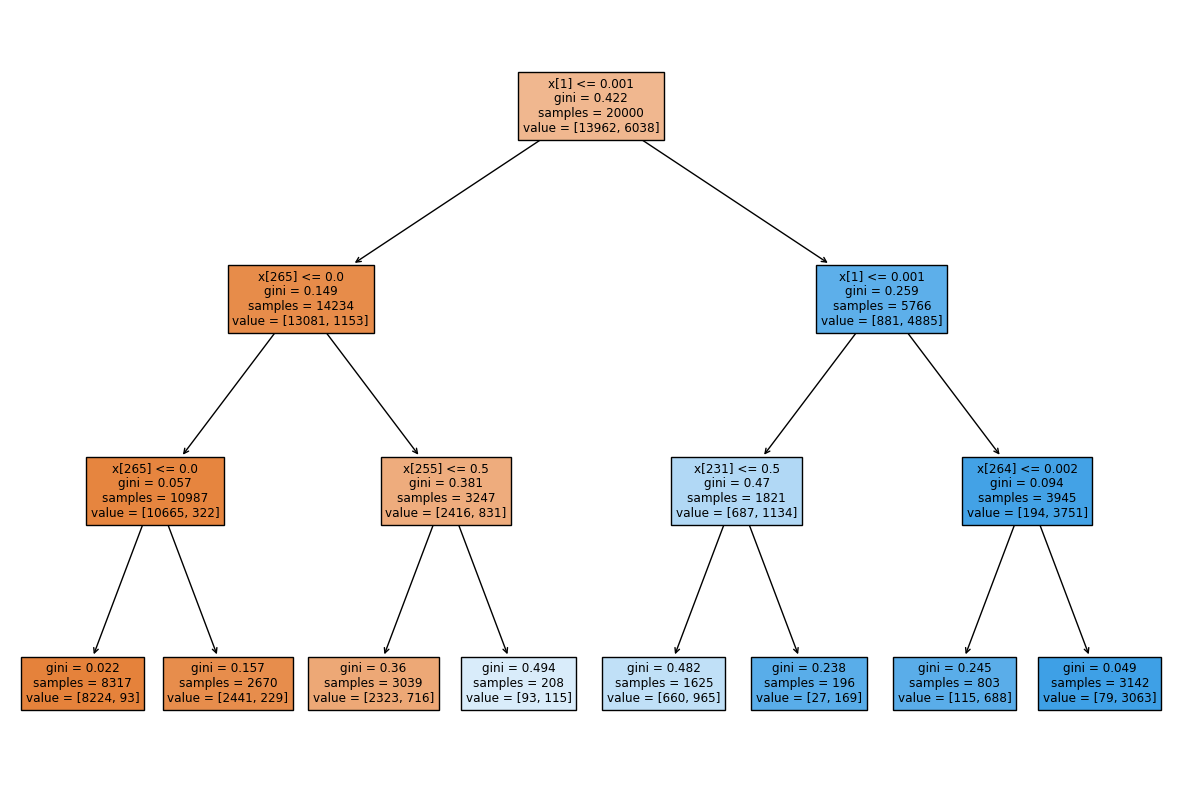

In [117]:
#Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

clf= tree.DecisionTreeClassifier(max_depth=3, random_state=42)

clf=clf.fit(X_train_scaled, y_train)
 
plt.figure(figsize=(15,10))
tree.plot_tree(clf, filled=True)

In [118]:
#Using GRIDSEARCH

# Define the parameter grid for the Decision Tree
param_grid = {'criterion' :["gini","entropy"],
              'max_depth': [1, 2, 3, 4, 5, 6, 7],
              'min_samples_split': [2, 5, 10, 20, 40, 60, 80, 100]}

# Define the Decision Tree classifier
tree = DecisionTreeClassifier()

# Perform grid search to find the best hyperparameters
Random_search = RandomizedSearchCV(tree, param_grid, cv=5, scoring='accuracy')
Random_search.fit(X_train_scaled, y_train)
print("Best parameters:", Random_search.best_params_)
print("Best cross-validation score:", Random_search.best_score_)

# Train Decision Tree with best hyperparameters and evaluate on test data
tree_best = DecisionTreeClassifier(max_depth=Random_search.best_params_['max_depth'], min_samples_split=Random_search.best_params_['min_samples_split'])
tree_best.fit(X_train_scaled, y_train)
y_pred_tree = tree_best.predict(X_test_scaled)
print("Test accuracy with best hyperparameters:", tree_best.score(X_test_scaled, y_test))

# Classification report and Confusion Matrix
print("\nDecision Tree:\n", classification_report(y_test, y_pred_tree))
print("\nConfusion Matrix for Decision Tree:\n", confusion_matrix(y_test, y_pred_tree))

# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_tree)
roc_auc = roc_auc_score(y_test, y_pred_tree)
print("\n ROC curve and AUC")
print("Area under the ROC curve: {:.2f}".format(roc_auc))


Best parameters: {'min_samples_split': 100, 'max_depth': 5, 'criterion': 'gini'}
Best cross-validation score: 0.90015
Test accuracy with best hyperparameters: 0.8914

Decision Tree:
               precision    recall  f1-score   support

       False       0.93      0.91      0.92      3491
        True       0.81      0.84      0.82      1509

    accuracy                           0.89      5000
   macro avg       0.87      0.88      0.87      5000
weighted avg       0.89      0.89      0.89      5000


Confusion Matrix for Decision Tree:
 [[3188  303]
 [ 240 1269]]

 ROC curve and AUC
Area under the ROC curve: 0.88


### 6.1.6. Bagging Classifier


In [119]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Define the parameter grid for the BaggingClassifier
param_grid = {
    'base_estimator': [DecisionTreeClassifier(max_depth=5), DecisionTreeClassifier(max_depth=10)],
    'n_estimators': [50, 100, 200],
    'max_samples': [0.5, 0.8, 1.0],
    'max_features': [0.5, 0.8, 1.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False]
}

# Define the BaggingClassifier
bagging = BaggingClassifier()

# Perform grid search to find the best hyperparameters
Random_search = RandomizedSearchCV(bagging, param_grid, cv=5, scoring='accuracy')
Random_search.fit(X_train_scaled, y_train)
print("Best parameters:", Random_search.best_params_)
print("Best cross-validation score:", Random_search.best_score_)

# Train BaggingClassifier with best hyperparameters and evaluate on test data
bagging_best = BaggingClassifier(**Random_search.best_params_)
bagging_best.fit(X_train_scaled, y_train)
print("Test accuracy with best hyperparameters:", bagging_best.score(X_test_scaled, y_test))

# Classification report and Confusion Matrix
y_pred_bagging = bagging_best.predict(X_test_scaled)
print("\nBaggingClassifier:\n", classification_report(y_test, y_pred_bagging))
print("\nConfusion Matrix for BaggingClassifier:\n", confusion_matrix(y_test, y_pred_bagging))

# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_bagging)
roc_auc = roc_auc_score(y_test, y_pred_bagging)
print("\n ROC curve and AUC")
print("Area under the ROC curve: {:.2f}".format(roc_auc))


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble

Best parameters: {'n_estimators': 200, 'max_samples': 1.0, 'max_features': 0.5, 'bootstrap_features': True, 'bootstrap': True, 'base_estimator': DecisionTreeClassifier(max_depth=10)}
Best cross-validation score: 0.9031500000000001


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Test accuracy with best hyperparameters: 0.8922

BaggingClassifier:
               precision    recall  f1-score   support

       False       0.93      0.91      0.92      3491
        True       0.81      0.85      0.83      1509

    accuracy                           0.89      5000
   macro avg       0.87      0.88      0.87      5000
weighted avg       0.89      0.89      0.89      5000


Confusion Matrix for BaggingClassifier:
 [[3183  308]
 [ 231 1278]]

 ROC curve and AUC
Area under the ROC curve: 0.88


### 6.1.7 RandomForestClassifier

In [120]:
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid for the Random Forest Classifier
param_grid = {'n_estimators': [50, 100, 200],
              'max_depth': [3, 5, 7, 9],
              'min_samples_split': [2, 4, 6, 30, 50, 80, 100]}

# Define the Random Forest Classifier
rfc = RandomForestClassifier(random_state=42)

# Perform Random search to find the best hyperparameters
Random_search = RandomizedSearchCV(rfc, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
Random_search.fit(X_train_scaled, y_train)
print("Best parameters:", Random_search.best_params_)
print("Best cross-validation score:", Random_search.best_score_)

# Train Random Forest Classifier with best hyperparameters and evaluate on test data
rfc_best = RandomForestClassifier(random_state=42, **Random_search.best_params_)
rfc_best.fit(X_train_scaled, y_train)
y_pred_rfc = rfc_best.predict(X_test_scaled)
print("Test accuracy with best hyperparameters:", rfc_best.score(X_test_scaled, y_test))

# Classification report and Confusion Matrix
print("\nRandom Forest Classifier:\n", classification_report(y_test, y_pred_rfc))
print("\nConfusion Matrix for Random Forest Classifier:\n", confusion_matrix(y_test, y_pred_rfc))

# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rfc)
roc_auc = roc_auc_score(y_test, y_pred_rfc)
print("\n ROC curve and AUC")
print("Area under the ROC curve: {:.2f}".format(roc_auc))


Best parameters: {'n_estimators': 50, 'min_samples_split': 80, 'max_depth': 9}
Best cross-validation score: 0.9025000000000001
Test accuracy with best hyperparameters: 0.8858

Random Forest Classifier:
               precision    recall  f1-score   support

       False       0.94      0.90      0.92      3491
        True       0.78      0.86      0.82      1509

    accuracy                           0.89      5000
   macro avg       0.86      0.88      0.87      5000
weighted avg       0.89      0.89      0.89      5000


Confusion Matrix for Random Forest Classifier:
 [[3126  365]
 [ 206 1303]]

 ROC curve and AUC
Area under the ROC curve: 0.88


### 6.1.8 Gradient Boosting Algorithm

In [121]:
from sklearn.ensemble import GradientBoostingClassifier

# Define the parameter grid for Gradient Boosting
param_grid = {'n_estimators': [50, 100, 200],
              'learning_rate': [0.01, 0.1, 1],
              'max_depth': [3, 4, 5],
              'subsample': [0.5, 0.8, 1.0]}

# Define the Gradient Boosting classifier
gb = GradientBoostingClassifier(random_state=42)

# Perform Random search to find the best hyperparameters
Random_search = RandomizedSearchCV(gb, param_grid, cv=5, scoring='accuracy')
Random_search.fit(X_train_scaled, y_train)
print("Best parameters:", Random_search.best_params_)
print("Best cross-validation score:", Random_search.best_score_)

# Train Gradient Boosting with best hyperparameters and evaluate on test data
gb_best = GradientBoostingClassifier(random_state=42, **Random_search.best_params_)
gb_best.fit(X_train_scaled, y_train)
print("Test accuracy with best hyperparameters:", gb_best.score(X_test_scaled, y_test))

# Classification report and Confusion Matrix
y_pred_gb = gb_best.predict(X_test_scaled)
print("\nGradient Boosting:\n", classification_report(y_test, y_pred_gb))
print("\nConfusion Matrix for Gradient Boosting:\n", confusion_matrix(y_test, y_pred_gb))

# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_gb)
roc_auc = roc_auc_score(y_test, y_pred_gb)
print("\n ROC curve and AUC")
print("Area under the ROC curve: {:.2f}".format(roc_auc))


Best parameters: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.1}
Best cross-validation score: 0.90395
Test accuracy with best hyperparameters: 0.8922

Gradient Boosting:
               precision    recall  f1-score   support

       False       0.94      0.91      0.92      3491
        True       0.80      0.86      0.83      1509

    accuracy                           0.89      5000
   macro avg       0.87      0.88      0.87      5000
weighted avg       0.90      0.89      0.89      5000


Confusion Matrix for Gradient Boosting:
 [[3166  325]
 [ 214 1295]]

 ROC curve and AUC
Area under the ROC curve: 0.88


### 6.1.9. XGBoost Algorithm

In [122]:
pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [123]:
import xgboost as xgb

# Define the parameter grid for XGBoost
param_grid = {'max_depth': [3, 5, 7],
              'learning_rate': [0.01, 0.1, 0.5],
              'n_estimators': [50, 100, 200]}

# Define the XGBoost classifier
xgb_clf = xgb.XGBClassifier(random_state=42)

# Perform Random search to find the best hyperparameters
Random_search = RandomizedSearchCV(xgb_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
Random_search.fit(X_train_scaled, y_train)
print("Best parameters:", Random_search.best_params_)
print("Best cross-validation score:", Random_search.best_score_)

# Train XGBoost classifier with best hyperparameters and evaluate on test data
xgb_best = xgb.XGBClassifier(random_state=42, **Random_search.best_params_)
xgb_best.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_best.predict(X_test_scaled)
print("Test accuracy with best hyperparameters:", xgb_best.score(X_test_scaled, y_test))

# Classification report and Confusion Matrix
print("\nXGBoost Classifier:\n", classification_report(y_test, y_pred_xgb))
print("\nConfusion Matrix for XGBoost Classifier:\n", confusion_matrix(y_test, y_pred_xgb))

# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_xgb)
roc_auc = roc_auc_score(y_test, y_pred_xgb)
print("\n ROC curve and AUC")
print("Area under the ROC curve: {:.2f}".format(roc_auc))


Best parameters: {'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1}
Best cross-validation score: 0.9048499999999999
Test accuracy with best hyperparameters: 0.8942

XGBoost Classifier:
               precision    recall  f1-score   support

       False       0.94      0.91      0.92      3491
        True       0.80      0.86      0.83      1509

    accuracy                           0.89      5000
   macro avg       0.87      0.88      0.88      5000
weighted avg       0.90      0.89      0.90      5000


Confusion Matrix for XGBoost Classifier:
 [[3175  316]
 [ 213 1296]]

 ROC curve and AUC
Area under the ROC curve: 0.88


### 6.1.10 Ada Boost Algorithm

In [124]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Define the parameter distributions for RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': uniform(0.01, 0.5),
    'algorithm': ['SAMME', 'SAMME.R']
}

# Define the Adaboost Classifier
abc = AdaBoostClassifier(random_state=42)

# Perform randomized search to find the best hyperparameters
random_search = RandomizedSearchCV(abc, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train_scaled, y_train)

print("Best parameters:", random_search.best_params_)
print("Best cross-validation score:", random_search.best_score_)

# Train Adaboost Classifier with best hyperparameters and evaluate on test data
abc_best = AdaBoostClassifier(random_state=42, **random_search.best_params_)
abc_best.fit(X_train_scaled, y_train)
y_pred_abc = abc_best.predict(X_test_scaled)
print("Test accuracy with best hyperparameters:", abc_best.score(X_test_scaled, y_test))

# Classification report and Confusion Matrix
print("\nAdaboost Classifier:\n", classification_report(y_test, y_pred_abc))
print("\nConfusion Matrix for Adaboost Classifier:\n", confusion_matrix(y_test, y_pred_abc))

# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_abc)
roc_auc = roc_auc_score(y_test, y_pred_abc)
print("\n ROC curve and AUC")
print("Area under the ROC curve: {:.2f}".format(roc_auc))


Best parameters: {'algorithm': 'SAMME.R', 'learning_rate': 0.03820578951355013, 'n_estimators': 300}
Best cross-validation score: 0.90145
Test accuracy with best hyperparameters: 0.8892

Adaboost Classifier:
               precision    recall  f1-score   support

       False       0.94      0.90      0.92      3491
        True       0.79      0.86      0.82      1509

    accuracy                           0.89      5000
   macro avg       0.86      0.88      0.87      5000
weighted avg       0.89      0.89      0.89      5000


Confusion Matrix for Adaboost Classifier:
 [[3155  336]
 [ 218 1291]]

 ROC curve and AUC
Area under the ROC curve: 0.88


### 6.1.11 Stacking the Models

In [125]:
#Trying Stacking Model to see if the accuracy further improves

from sklearn.ensemble import StackingClassifier

# Define the meta model
meta_model = LogisticRegression(random_state=42)

# Define the stacking classifier
estimators = [('rf', rfc_best), ('gbc', xgb_best), ('lr', lr_gs)]
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=meta_model)

# Fit the stacking classifier on the training set
stacking_clf.fit(X_train_scaled, y_train)

# Predict on the test set and evaluate
y_pred = stacking_clf.predict(X_test_scaled)
print("Test accuracy:", stacking_clf.score(X_test_scaled, y_test))
print("Classification report:\n", classification_report(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC curve and AUC:")
print("Area under the ROC curve: {:.2f}".format(roc_auc))


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Test accuracy: 0.8944
Classification report:
               precision    recall  f1-score   support

       False       0.94      0.91      0.92      3491
        True       0.80      0.86      0.83      1509

    accuracy                           0.89      5000
   macro avg       0.87      0.88      0.88      5000
weighted avg       0.90      0.89      0.90      5000

Confusion matrix:
 [[3174  317]
 [ 211 1298]]
ROC curve and AUC:
Area under the ROC curve: 0.88


# Geojson file has ward numbers and population density file has pincodes. :(

  Limitation with population density - type of people in terms of economic status and commercial locations may not record how many people live in a particular area

  Based on Population Density, competetion

#### Demographic: minimum population density of 3000 people per squared kilometer
#### Competition: the chosen district can't have more than 20 establishments of the same category as the one to be chosen
#### Location: as close to the city center as possible

In [ ]:
# Importing the files into Colab

from google.colab import files
uploaded = files.upload()

In [ ]:
# Calculate correlation matrix
corr_matrix = RCdata1.corr().abs()

# Extract top 5 correlated feature pairs
top_corr_features = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                     .stack().sort_values(ascending=False)[:5].index.tolist())

# Print the top 5 correlated feature pairs
for pair in top_corr_features:
    print(pair)

In [ ]:
# Set the display options to show all columns
pd.set_option('display.max_columns', None)

# Print the data types of all columns
print(RCdata1.dtypes)

In [ ]:
pip install geojson

In [ ]:
#import all the necessary library for this project
import pandas as pd
import geojson
import json  
import folium
from sklearn.cluster import KMeans
import numpy as np
from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
g = open('BLR_Pincodes.geojson',) 
gdata = geojson.load(g)
#
communities_map = folium.Map(location=[12.966180000000065, 77.58690000000007], zoom_start=12,)
communities_map.choropleth(geo_data=gdata,    fill_color='YlGn',
    fill_opacity=0.2,
    line_opacity=1,)
communities_map

In [ ]:
import folium
import pandas as pd

# Load the CSV file into a DataFrame

# Filter the DataFrame to select restaurants
rst = RCdata1[RCdata1['category'] == "Restaurants"]
caf = RCdata1[RCdata1['category'] == "Café"]


# Convert Latitude and Longitude to floats
rst['latitude'] = rst['latitude'].astype(float)
rst['longitude'] = rst['longitude'].astype(float)

# Combine Latitude and Longitude into a single column as tuple
rst["coor"] = rst[["latitude", "longitude"]].apply(lambda row: (row["latitude"], row["longitude"]), axis=1)

# Drop duplicate coordinates
rst.drop_duplicates(subset=['coor'], inplace=True)

# Convert Latitude and Longitude to floats
caf['latitude'] = caf['latitude'].astype(float)
caf['longitude'] = caf['longitude'].astype(float)

# Combine Latitude and Longitude into a single column as tuple
caf["coor"] = caf[["latitude", "longitude"]].apply(lambda row: (row["latitude"], row["longitude"]), axis=1)

# Drop duplicate coordinates
caf.drop_duplicates(subset=['coor'], inplace=True)

# Create the map centered on Bangalore
center = [12.966180000000065, 77.58690000000007]
communities_map2 = folium.Map(location=center, zoom_start=12)

# Add the choropleth layer
folium.Choropleth(geo_data='BLR_Pincodes.geojson', fill_color='YlGn', fill_opacity=0.2, line_opacity=1).add_to(communities_map2)

# Add a circle marker for each restaurant
for _, row in rst.iterrows():
    folium.CircleMarker(location=row['coor'], radius=1, color='green', fill=True, fill_color='green', fill_opacity=1).add_to(communities_map2)

for _, row in caf.iterrows():
    folium.CircleMarker(location=row['coor'], radius=1, color='red', fill=True, fill_color='ered', fill_opacity=1).add_to(communities_map2)

# Display the map
communities_map2


In [ ]:
# Importing the files into Colab

from google.colab import files
uploaded = files.upload()

In [ ]:
import io
Pincodes = pd.read_csv(io.BytesIO(uploaded['PinCodes.csv']))

In [ ]:
import pandas as pd
import json
import folium

# Load the GeoJSON file
with open('BLR_Pincodes.geojson') as f:
    geojson_data = json.load(f)

# Load the population density data from the CSV file
pincodes_data = pd.read_csv('PinCodes.csv')

# Match the pin codes with the corresponding wards in the GeoJSON file
for feature in geojson_data['features']:
    postal_code = feature['properties']['pin_code']
    density = pincodes_data.loc[pincodes_data['postal_code'] == postal_code, 'Population_Density'].values
    feature['properties']['density'] = density[0] if len(density) > 0 else 0

# Create a choropleth map using the GeoJSON file and the population density data for each ward
map = folium.Map(location=[12.9716, 77.5946], zoom_start=10)
folium.Choropleth(
    geo_data=geojson_data,
    name='Population Density',
    data=pincodes_data,
    columns=['postal_code', 'Population_Density'],
    key_on='feature.properties.pin_code',
    fill_color='PuRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Population Density'
).add_to(map)
folium.LayerControl().add_to(map)
map.save('map.html')
map

In [ ]:

# Group cafes and restaurants by pincode and count the number of each
cafe_counts = restdata.groupby('postal_code')['google_id'].count()
cafe_counts.columns = ['postal_code', 'Count']

cafe_counts.shape


In [ ]:

# Create a Folium map centered at Bangalore
map = folium.Map(location=[12.9716, 77.5946], zoom_start=10)

# Create a choropleth map based on cafe counts
choropleth = folium.Choropleth(
    geo_data=geojson_data,
    name='choropleth',
    data=cafe_counts,
    columns=['postal_code', 'Count'],
    key_on='feature.properties.pin_code',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Cafe Density'
).add_to(map)

# Add a layer control to the map
folium.LayerControl().add_to(map)

# Display the map
map



I decided to proceed with Electronic city as the location (above analysis from Human intelligence - upcmonig metro, upcoming corporates, oustide city for peaceful ambience)

Now Comes the question of what kind of food service should I open